Quadrupedal Walking Frog Code

This code analyses the force and kinematic data for multiple frog species walked across a multi-axis force platform. The x, y, and z forces were analysed. Using the x, y and z force data, we calculate the resultant force (). Joint angle data was collect via digitization of high-speed videography in two views (dorsal and lateral) over two strides for the fore- and hindlimbs.
Contributors:
J Fabian Dubon
M Kearns
CM Reynaga
Last updated:
Dec 28, 2022 /April 5, 2024




Setting Directory 

In [126]:
import pandas as pd 
import numpy as np 
import openpyxl as pyxl  
import matplotlib.pyplot as plt
import math as math
 
#'/Users/jenifer_dubon/Desktop/walking_frog_force/walking_frog_force/Datasets/walks_workbook.xlsx'


Parameters
A single stride was defined as: The start of the stride begins the moment the forelimb phallange/limb closest to the lateral veiew camera makes contact with the ground. The stride ends once all limbs have cycled through, until the start of the same forelimb is about to make contact again with the ground to begin a new stride.
Video Information
This section will read in the parameters from the following imported excel sheet.
Defines a variable with the file name as a string

In [127]:
params = '/Users/jenifer_dubon/Desktop/walking_frog_force/walking_frog_force/Datasets/walks_workbook.xlsx'


Imports data file and saves the file as a struct named parameters, the struct is organized as within two fields (1) data and (2) textdata. Any column names or text values within the spreadsheet will be in textdata and any numerical values will be in data.

In [128]:
parameters = pd.read_excel(params)

elects which row to process within the excel parameters sheet
Change number based upon the row you'd like to process within the excel spread sheet and save the matlab code before you run the code

In [129]:
excel_row_to_process = 2 #must start at 2 bc of pandas structure
film_side_right = True

Video/Force Sampling Information
Reading in parameters from excel sheet.


In [130]:
row_to_process = excel_row_to_process-1

# Print the size of the parameters variable
display(parameters.shape)

if 'Date' in parameters.columns:
    date = str(int(parameters['Date'].iloc[row_to_process])) #iloc is more of a personal pref #must change to int first to get rid off .0 
else:
    print("Error: 'Date' not found in DataFrame")

genus_species = 'pb' # Phrynomantis bifasciatus

if 'Ind.' in parameters.columns:
    individual = str(int(parameters['Ind.'].iloc[row_to_process]))
else:
    print("Error: 'Ind.' not found in DataFrame")

if 'Walk' in parameters.columns:
    walk_num = str(int(parameters['Walk'].iloc[row_to_process]))
else:
    print("Error: 'Walk' not found in DataFrame")

print(walk_num)
walk_seq = date + '_' + genus_species + individual + '_walk'+ walk_num 
fps = 250

print(walk_seq)


(62, 30)

2
20210706_pb4_walk2


In [131]:

""" this is for me to try different approaches.


row_to_process = excel_row_to_process-1

# Print the size of the parameters variable
display(parameters.shape)

type(parameters) #gets the type 

if 'Date' in parameters.columns:
    date = str(parameters['Date'].iloc[row_to_process])

else:
    print("Error: Date not found in DataFrame")
    
print(date)
    
if 'Ind.' in parameters.columns:
    individual = str(parameters['Ind.'][row_to_process])

else:
    print('Error')    
    
print(individual)

type(individual)


#set up variables to right columns 
#date = str(parameters.Date[row_to_process])


walk_seq = date,'_', genus_species, individual, '_walk', walk_num #append has a limited num of arguments
#so the best way to concatenate strings is to add the '+ ' sign in between 
#print(date)

#type(date)
#parameters.info() #gets the """



' this is for me to try different approaches.\n\n\nrow_to_process = excel_row_to_process-1\n\n# Print the size of the parameters variable\ndisplay(parameters.shape)\n\ntype(parameters) #gets the type \n\nif \'Date\' in parameters.columns:\n    date = str(parameters[\'Date\'].iloc[row_to_process])\n\nelse:\n    print("Error: Date not found in DataFrame")\n    \nprint(date)\n    \nif \'Ind.\' in parameters.columns:\n    individual = str(parameters[\'Ind.\'][row_to_process])\n\nelse:\n    print(\'Error\')    \n    \nprint(individual)\n\ntype(individual)\n\n\n#set up variables to right columns \n#date = str(parameters.Date[row_to_process])\n\n\nwalk_seq = date,\'_\', genus_species, individual, \'_walk\', walk_num #append has a limited num of arguments\n#so the best way to concatenate strings is to add the \'+ \' sign in between \n#print(date)\n\n#type(date)\n#parameters.info() #gets the '

In [132]:
#frames per second (fps) high speed video frame rate
igor_sr = 10000

if 'Ind. Weight (g)' in parameters.columns:
    body_mass = parameters['Ind. Weight (g)'].iloc[row_to_process]
else:
    print("Error: 'Ind. Weight (g)' not found in DataFrame")

print(body_mass) #prints are to make sure results are the same

5.77


 *Video Conditions*
 Determines whether the code should run data on the forelimb or the hindlimb.
 A value of 1 will run analysis for the relevent limbs, however a value of 0
 will skip those sections for analysis within the script. Additionally, |Overlap|
 is used to distinguish when the fore- and hindlimb are both in contact with
 the force plate, and thus individual limb analysis during that time can not
 be done.

In [133]:
#these variables  are floats so they got 0.0 
if 'Forelimb Status (0/1)' in parameters.columns:
    FL = parameters['Forelimb Status (0/1)'].iloc[row_to_process]
else:
    print("Error: 'Forelimb Status (0/1)' not found in DataFrame")

print(FL)

if 'Hindlimb Status (0/1)' in parameters.columns:
    HL = parameters['Hindlimb Status (0/1)'].iloc[row_to_process]
else:
    print("Error: 'Hindlimb Status (0/1)' not found in DataFrame")

print(HL)

if 'Overlap (0/1)' in parameters.columns:
    Overlap = parameters['Overlap (0/1)'].iloc[row_to_process]
else:
    print("Error: 'Overlap (0/1)' not found in DataFrame")
print(Overlap)



1.0
0.0
1.0


Walk Sequence Information
Converting video frames into time (sec)

In [134]:
if 'tot. dltdv8 frames' in parameters.columns:
    totalf = parameters['tot. dltdv8 frames'].iloc[row_to_process] # total amount of video frames
else:
    print("Error: 'tot. dltdv8 frames' not found in DataFrame")
print(totalf)

678.0


In [135]:
#totalf_sec is rounded here to the same decimals place as the force data frequency
totalf_sec = round((totalf/fps),4) #total amount of time filmed (sec)
print(totalf_sec)

2.712


Defining Stride 1
Beginning frame for stride 1 defined when forelimb (or phalange of the forelimb) nearest to the camera touches the ground


In [136]:
if 'Forelimb Start frame' in parameters.columns:
    startf_s1 = parameters['Forelimb Start frame'][row_to_process ]-1 #bc of indexing in python, it starts at 97 not 98 (ensures the pt1_X are the same in matlab and python)
else:
    print("Error: 'Forelimb Start frame' not found in DataFrame")
print(startf_s1)
print(row_to_process)    

startf_s1_sec = np.round((startf_s1/fps),4)
print(startf_s1_sec)

#python startf_s1_sec is 0.388, matlab startf_s1_sec is 3920 

97.0
1
0.388


End frame for stride 1 
Defined as the frame right before the forelimb touches back to start the next stride

In [137]:
if 'Stride 1 end frame' in parameters.columns:
    endf_s1 = parameters['Stride 1 end frame'].iloc[row_to_process]-1 #same here, it ends at 294
else:
    print("Error: 'Stride 1 end frame' not found in DataFrame")
print(endf_s1)

294.0


Conversion from frames to time (sec) by dividing by frame rate or recording frequency in frames per second (fps).

time(sec) = frame #/fps

In [138]:
endf_s1_sec = round((endf_s1/fps),4)
print(endf_s1_sec)

1.176


Defining Stride 2
 See section above for more information on defining a stride and calculating
 time from frame number for a stride.


In [139]:
if 'Stride 2 Start frame' in parameters.columns:
    startf_s2 = parameters['Stride 2 Start frame'].iloc[row_to_process]
else:
    print("Error: 'Stride 2 Start frame' not found in DataFrame")
print(startf_s2)

startf_s2_sec = round((startf_s2/fps),4)
print(startf_s2_sec)

296.0
1.184


End frame for stride 2;
If not a complete 2ns stride insert '0' within parameters excel sheet (however at this point we should only be analyzing walks with 2 complete strides).

In [140]:
if 'Stride 2 end frame' in parameters.columns:
    endf_s2 = parameters['Stride 2 end frame'].iloc[row_to_process]
else:
    print("Error: 'Stride 2 end frame' not found in DataFrame")
print(endf_s2)

endf_s2_sec = round((endf_s2/fps),4)
print(endf_s2_sec)

0
0.0


Characterizing Igor time based upon trigger time
 Finding when the cameras and data collection in Igor were triggered off.
 format long g % if not displaying full decimal


In [141]:
if 'Igor trigger time' in parameters.columns:
    trigger_row = parameters['Igor trigger time'].iloc[row_to_process]
else:
    print("Error: 'Igor trigger time' not found in DataFrame")
print(trigger_row)

trigger_t = trigger_row/10000
print(trigger_t)

8714.0
0.8714


Creating a time array for forceplate data. 
 Igor|_sr| = sampling rate. Plus rounding to the correct decimals place based upon the Igor sampling frequency (1000) force recording for a total of 10 seconds.

In [142]:
force_t = np.arange(1, igor_sr + 1)/1000

force_time = np.round(force_t, 4)
print(force_time.size)

10000


FL and HL Contact Timing
  Defining relative to time when the forelimb and hindlimb are in contact with  the force plate.

 |fl_end| = last frame the front finger/hand is in contact with the force plate before leaving

In [143]:
if 'Forelimb end frame' in parameters.columns:
    fl_end = parameters['Forelimb end frame'].iloc[row_to_process]
else:
    print("Error: 'Forelimb end frame' not found in DataFrame")
print(fl_end)

fl_end_sec = round((fl_end/fps),4); # converting to time
print(fl_end_sec)

270.0
1.08


hl_start:
 when a toe/foot touches the force plate/hindlind makes contact with the forceplate for the first time.

In [144]:
if 'Hindlimb Start frame' in parameters.columns:
    hl_start = parameters['Hindlimb Start frame'].iloc[row_to_process]
else:
    print("Error: 'Hindlimb Start frame' not found in DataFrame")
print(hl_start)

hl_start_sec = round((hl_start/fps),4); # converting to time
print(hl_start_sec)

239.0
0.956


hl_end:
 last frame back toe touches force plate before leaving

In [145]:
if 'Hindlimb end frame' in parameters.columns:
    hl_end = parameters['Hindlimb end frame'].iloc[row_to_process]
else:
    print("Error: 'Hindlimb end frame' not found in DataFrame")
print(hl_end)

hl_end_sec = round((hl_end/fps),4); # converting to time
print(hl_end_sec)

0.0
0.0


Determining Periods of Overlap
 Isolating FL and HL contact only periods
 During most walks the FL and HL will both be in contact with the force plate
 midway between stride 1 and stride 2. Therefore, we only analyze the forces
 recorded when and individual limb is in contact with the force platform. More
 specifically, we only analyze the forelimb contact period during the time before
 the hindlimb touches down. And analyze the hindlimb contact during the time
 after the forelimb has left the force plate.

 |fl_only_end| = frame where only the FL leaves contact with the force plate,
 then converting to time (sec).


In [146]:
# MAYBE DO TODO will need a conditional statement for walks where there isn't overlap
fl_only_end = hl_start-1
print(fl_only_end)
fl_only_end_sec = round((fl_only_end/fps),4)
print(fl_only_end_sec)


238.0
0.952


hl_only_start:
 start frame where the HL is the only one that is in contact with the force plate, then converting frames to time (sec).

In [147]:
hl_only_start = fl_end+1
print(hl_only_start)
hl_only_start_sec = round((hl_only_start/fps),4)
print(hl_only_start_sec)

271.0
1.084


Changing reference frame of the video land markers

Finding the distance in time from the end of the video, to set-up and align time relative to the trigger time. And ultimately determine where force occurs relative to trigger and video timing. Example conversion equations provided:

    time = t_video_length - t_event_start

In [148]:
delta_s1_start = totalf_sec - startf_s1_sec
print(delta_s1_start, totalf_sec, startf_s1_sec)
delta_hl_on = totalf_sec-hl_start_sec
print(delta_hl_on)
delta_fl_end = totalf_sec-fl_end_sec
print(delta_fl_end)
delta_s1_end = totalf_sec-endf_s1_sec
print("delta_s1_end",delta_s1_end)
delta_s2_start = totalf_sec-startf_s2_sec
print(delta_s2_start)
delta_hl_end = totalf_sec-hl_end_sec
print(delta_hl_end)
delta_s2_end = totalf_sec-endf_s2_sec
print(delta_s2_end)

delta_fl_only_end = totalf_sec - fl_only_end_sec
print(delta_fl_only_end)
delta_hl_only_start = totalf_sec - hl_only_start_sec
print(delta_hl_only_start)


2.3240000000000003 2.712 0.388
1.7560000000000002
1.6320000000000001
delta_s1_end 1.5360000000000003
1.5280000000000002
2.712
2.712
1.7600000000000002
1.6280000000000001


Importing Digitized Data Points

All videos for K. senegalensis were digitized with the assigned point number values.
FIXIT Note: this will differ across different species unfortunately.
Eye
Elbow
Wrist
Shoulder
Knee
Ankle
Hip
Knee
Tarsometatarsal (HL)
Tarsometatarsal (LF)

Importing digitized XYZ pts spreadsheet
Imports xyz points as a struct/tuple named xyzpts

In [149]:
xyzfile = walk_seq + '_xyzpts.csv'
xyzfile = '/Users/jenifer_dubon/Desktop/walking_frog_force/walking_frog_force/Datasets/' + xyzfile
print('/Users/jenifer_dubon/Desktop/walking_frog_force/walking_frog_force/Datasets/' + xyzfile)
xyzpts = pd.read_csv(xyzfile)

print(xyzpts.shape) #different than matalab (matlab = 311x30, but this is the same as excel sheet)

print(type(xyzpts.shape))

#this is to check that row 97 in python is the same as row 98 in matlab, it is!
for i, row in enumerate(xyzpts.iterrows()):
    if i == 97:
        display(row[1])
        break
    


/Users/jenifer_dubon/Desktop/walking_frog_force/walking_frog_force/Datasets//Users/jenifer_dubon/Desktop/walking_frog_force/walking_frog_force/Datasets/20210706_pb4_walk2_xyzpts.csv
(678, 30)
<class 'tuple'>


pt1_X     -4.557530
pt1_Y     50.729095
pt1_Z     67.734753
pt2_X     -8.742226
pt2_Y     62.956456
pt2_Z     73.954070
pt3_X      2.106753
pt3_Y     65.671171
pt3_Z     75.870225
pt4_X    -13.089889
pt4_Y     54.091077
pt4_Z     70.579872
pt5_X    -42.744714
pt5_Y     62.533530
pt5_Z     72.008735
pt6_X    -52.149068
pt6_Y     54.476672
pt6_Z     68.632958
pt7_X    -42.480322
pt7_Y     52.388633
pt7_Z     66.629120
pt8_X    -25.746847
pt8_Y     45.479722
pt8_Z     62.457404
pt9_X    -53.772872
pt9_Y     62.243892
pt9_Z     73.924469
pt10_X     6.756859
pt10_Y    63.859504
pt10_Z    76.432015
Name: 97, dtype: float64

Assigning points as variables from the imported spreadsheet matrix xyzpts struct/Tuple


In order to make sure that MATLAB orients the data correctly, we assign the point values to the individual columns, and specify the frame number range separated by a column that we want to grab data from. Importanting relative to stride 1 and 2. The number designates the excel sheet row to look for.x

In [150]:
#display(xyzpts)
print( startf_s1)
print(endf_s1)
print(type( xyzpts.iloc[1].shape))

for col in xyzpts.columns:
    row_section_s1 = xyzpts[col][int(startf_s1):int(endf_s1) + 1]
    #display('row_section_s1', row_section_s1)
    if 'pt1_X' in col:
        pt1_X_s1 = row_section_s1 
    elif 'pt1_Y' in col:
        pt1_Y_s1 = row_section_s1
    elif 'pt1_Z' in col:
        pt1_Z_s1 = row_section_s1
        
    elif 'pt2_X' in col:
        pt2_X_s1 = row_section_s1 
    elif 'pt2_Y' in col:
        pt2_Y_s1 = row_section_s1
    elif 'pt2_Z' in col:
        pt2_Z_s1 = row_section_s1 
        
    elif 'pt3_X' in col:
        pt3_X_s1 = row_section_s1
    elif 'pt3_Y' in col:
        pt3_Y_s1 = row_section_s1
    elif 'pt3_Z' in col:
        pt3_Z_s1 = row_section_s1  
        
    elif 'pt4_X' in col:
        pt4_X_s1 = row_section_s1     
    elif 'pt4_Y' in col:
        pt4_Y_s1 = row_section_s1
    elif 'pt4_Z' in col:
        pt4_Z_s1 = row_section_s1
    
    elif 'pt5_X' in col:
        pt5_X_s1 = row_section_s1
    elif 'pt5_Y' in col:
        pt5_Y_s1 = row_section_s1
    elif 'pt5_Z' in col:
        pt5_Z_s1 = row_section_s1
    
    elif 'pt6_X' in col:
        pt6_X_s1 = row_section_s1
    elif 'pt6_Y' in col:
        pt6_Y_s1 = row_section_s1
    elif 'pt6_Z' in col:
        pt6_Z_s1 = row_section_s1
    
    elif 'pt7_X' in col:
        pt7_X_s1 = row_section_s1
    elif 'pt7_Y' in col:
        pt7_Y_s1 = row_section_s1
    elif 'pt7_Z' in col:
        pt7_Z_s1 = row_section_s1
        
    elif 'pt8_X' in col:
        pt8_X_s1 = row_section_s1
    elif 'pt8_Y' in col:
        pt8_Y_s1 = row_section_s1
    elif 'pt8_Z' in col:
        pt8_Z_s1 = row_section_s1
        
    elif 'pt9_X' in col:
        pt9_X_s1 = row_section_s1
    elif 'pt9_Y' in col:
        pt9_Y_s1 = row_section_s1
    elif 'pt9_Z' in col:
        pt9_Z_s1 = row_section_s1
        
    elif 'pt10_X' in col:
        pt10_X_s1 = row_section_s1
    elif 'pt10_Y' in col:
        pt10_Y_s1 = row_section_s1
    elif 'pt10_Z' in col:
        pt10_Z_s1 = row_section_s1
        
#print(xyzpts.columns)
#display('row_section_s1', row_section_s1)
#print(row_section) check the sections are correct
display(pt2_Z_s1)


97.0
294.0
<class 'tuple'>


97     73.954070
98     73.936965
99     73.965687
100    74.061839
101    74.689817
         ...    
290    75.110863
291    75.562327
292    75.944462
293    76.058882
294    76.427859
Name: pt2_Z, Length: 198, dtype: float64

If data set has hindlimb data


In [151]:
print('startf_s2 =', startf_s2)
print('endf_s2 =', endf_s2)
print

#xyzpts FILES HAS NO HL DATA SO THIS IS NOT USED FOR THAT(RETURNS NOTHING)

###CHECK THIS WITH HL DATA 
#display(xyzpts.columns)


"""if HL == 1:
    for col in xyzpts.columns:
        row_section_s2 = xyzpts[col][int(startf_s2):int(endf_s2) + 1]
        display('row_section_s2', row_section_s2)
        if 'pt1_X' in col:
            pt1_X_s2 = row_section_s2
        #elif 'pt1_Y' in col:
         #   pt1_Y_s2 = row_section_s2
            
display('row_section_s2', pt1_X_sn1)
"""
if HL == 1:
    for col in xyzpts.columns:
        row_section_s2 = xyzpts[col][int(startf_s2):int(endf_s2) + 1]
        display('row_section_s2', row_section_s2)
        if 'pt1_X' in col:
            pt1_X_s2 = row_section_s2 
        elif 'pt1_Y' in col:
            pt1_Y_s2 = row_section_s2
        elif 'pt1_Z' in col:
            pt1_Z_s2 = row_section_s2
            
        elif 'pt2_X' in col:
            pt2_X_s2 = row_section_s2 
        elif 'pt2_Y' in col:
            pt2_Y_s2 = row_section_s2
        elif 'pt2_Z' in col:
            pt2_Z_s2 = row_section_s2 
            
        elif 'pt3_X' in col:
            pt3_X_s2 = row_section_s2
        elif 'pt3_Y' in col:
            pt3_Y_s2 = row_section_s2
        elif 'pt3_Z' in col:
            pt3_Z_s2 = row_section_s2  
            
        elif 'pt4_X' in col:
            pt4_X_s2 = row_section_s2     
        elif 'pt4_Y' in col:
            pt4_Y_s2 = row_section_s2
        elif 'pt4_Z' in col:
            pt4_Z_s2 = row_section_s2
        
        elif 'pt5_X' in col:
            pt5_X_s2 = row_section_s2
        elif 'pt5_Y' in col:
            pt5_Y_s2 = row_section_s2
        elif 'pt5_Z' in col:
            pt5_Z_s2 = row_section_s2
        
        elif 'pt6_X' in col:
            pt6_X_s2 = row_section_s2
        elif 'pt6_Y' in col:
            pt6_Y_s2 = row_section_s2
        elif 'pt6_Z' in col:
            pt6_Z_s2 = row_section_s2
        
        elif 'pt7_X' in col:
            pt7_X_s2 = row_section_s2
        elif 'pt7_Y' in col:
            pt7_Y_s2 = row_section_s2
        elif 'pt7_Z' in col:
            pt7_Z_s2 = row_section_s2
            
        elif 'pt8_X' in col:
            pt8_X_s2 = row_section_s2
        elif 'pt8_Y' in col:
            pt8_Y_s2 = row_section_s2
        elif 'pt8_Z' in col:
            pt8_Z_s2 = row_section_s2
            
        elif 'pt9_X' in col:
            pt9_X_s2 = row_section_s2
        elif 'pt9_Y' in col:
            pt9_Y_s2 = row_section_s2
        elif 'pt9_Z' in col:
            pt9_Z_s2 = row_section_s2
            
        elif 'pt10_X' in col:
            pt10_X_s2 = row_section_s2
        elif 'pt10_Y' in col:
            pt10_Y_s2 = row_section_s2
        elif 'pt10_Z' in col:
            pt10_Z_s2 = row_section_s2
        #if 'pt1_
else: 
    print('Error: not hl data in file ' ) #not sure if its needed
        
#display(row_section_s2)

startf_s2 = 296.0
endf_s2 = 0
Error: not hl data in file 


Both stride 1 and 2 digitized points concatinated into one array

TODO maybe make the cat the final version so even if there is only one FL data that's where we're getting all the calculations from.

In [152]:
if HL == 1:
    pt1_X = np.concatenate(pt1_X_s1, pt1_X_s2)
    print(pt1_X)
    pt1_Y = np.concatenate(1, pt1_Y_s1, pt1_Y_s2)
    pt1_Z = np.concatenate(1, pt1_Z_s1, pt1_Z_s2)
    
    pt2_X = np.concatenate(1, pt2_X_s1, pt2_X_s2)
    pt2_Y = np.concatenate(1, pt2_Y_s1, pt2_Y_s2)
    pt2_Z = np.concatenate(1, pt2_Z_s1, pt2_Z_s2)
    
    pt3_X = np.concatenate(1, pt3_X_s1, pt3_X_s2)
    pt3_Y = np.concatenate(1, pt3_Y_s1, pt3_Y_s2)
    pt3_Z = np.concatenate(1, pt3_Z_s1, pt3_Z_s2)
    
    pt4_X = np.concatenate(1, pt4_X_s1, pt4_X_s2)
    pt4_Y = np.concatenate(1, pt4_Y_s1, pt4_Y_s2)
    pt4_Z = np.concatenate(1, pt4_Z_s1, pt4_Z_s2)
    
    pt5_X = np.concatenate(1, pt5_X_s1, pt5_X_s2)
    pt5_Y = np.concatenate(1, pt5_Y_s1, pt5_Y_s2)
    pt5_Z = np.concatenate(1, pt5_Z_s1, pt5_Z_s2)
    
    pt6_X = np.concatenate(1, pt6_X_s1, pt6_X_s2)
    pt6_Y = np.concatenate(1, pt6_Y_s1, pt6_Y_s2)
    pt6_Z = np.concatenate(1, pt6_Z_s1, pt6_Z_s2)
    
    pt7_X = np.concatenate(1, pt7_X_s1, pt7_X_s2)
    pt7_Y = np.concatenate(1, pt7_Y_s1, pt7_Y_s2)
    pt7_Z = np.concatenate(1, pt7_Z_s1, pt7_Z_s2)
    
    pt8_X = np.concatenate(1, pt8_X_s1, pt8_X_s2)
    pt8_Y = np.concatenate(1, pt8_Y_s1, pt8_Y_s2)
    pt8_Z = np.concatenate(1, pt8_Z_s1, pt8_Z_s2)
    
    pt9_X = np.concatenate(1, pt9_X_s1, pt9_X_s2)
    pt9_Y = np.concatenate(1, pt9_Y_s1, pt9_Y_s2)
    pt9_Z = np.concatenate(1, pt9_Y_s1, pt9_Y_s2)
    
    pt10_X = np.concatenate(1, pt10_X_s1, pt10_X_s2)
    pt10_Y = np.concatenate(1, pt10_Y_s1, pt10_Y_s2)
    pt10_Z = np.concatenate(1, pt10_Y_s1, pt10_Y_s2)
    

Timing and Percent Stride

Creating Percent Stride for Digitized Data (Stride 1 and 2) Finding percent stride for stride 1 and 2
size finds the array size from the start of the stride to the end using the first and last frame of the strides

In [153]:
stride1array = np.arange(startf_s1, endf_s1 + 1)

stride1size = stride1array.size #(97, 294)- python 
print(stride1size)              #(98, 295)- matlab 


198


Calculates the percent stride array use to standardize across different walking trials, changes the time component usually at the x-axis values to plot y-axis variables of interest (e.g. force, torques, etc.) since every stride is going to be a different length in time.

In [154]:
stride1_a = np.arange(1, stride1size + 1)

p_stride1 = (stride1_a/ stride1size) * 100
display(p_stride1)  #197 rows python

array([  0.50505051,   1.01010101,   1.51515152,   2.02020202,
         2.52525253,   3.03030303,   3.53535354,   4.04040404,
         4.54545455,   5.05050505,   5.55555556,   6.06060606,
         6.56565657,   7.07070707,   7.57575758,   8.08080808,
         8.58585859,   9.09090909,   9.5959596 ,  10.1010101 ,
        10.60606061,  11.11111111,  11.61616162,  12.12121212,
        12.62626263,  13.13131313,  13.63636364,  14.14141414,
        14.64646465,  15.15151515,  15.65656566,  16.16161616,
        16.66666667,  17.17171717,  17.67676768,  18.18181818,
        18.68686869,  19.19191919,  19.6969697 ,  20.2020202 ,
        20.70707071,  21.21212121,  21.71717172,  22.22222222,
        22.72727273,  23.23232323,  23.73737374,  24.24242424,
        24.74747475,  25.25252525,  25.75757576,  26.26262626,
        26.76767677,  27.27272727,  27.77777778,  28.28282828,
        28.78787879,  29.29292929,  29.7979798 ,  30.3030303 ,
        30.80808081,  31.31313131,  31.81818182,  32.32

Provides percent stride for stride 2 and concatenates stride 1 and 2 together

In [155]:
if HL == 1:
    stride2array = np.arange(startf_s2, endf_s2 + 1)

    stride2size = stride2array.size  
    print(stride2size)
    
    stride2_a = np.arange(1, stride2size + 1)

    p_stride2 = (stride2_a/ stride2size) * 100
    display(p_stride2)  
    
    #% concatinating forelimb and hindlimb percent stride
    total_digitized_pstride = np.concatenate(1, p_stride1, p_stride2 + 1)  # + 1 so it includes all of it  # Use for videos with both FL and HL digitized data
    
elif HL== 0:
    total_digitized_pstride =  p_stride1 #  BC HL ==0 only use p_stride1 # use for videos with both FL and HL digitized data
    display(total_digitized_pstride)


array([  0.50505051,   1.01010101,   1.51515152,   2.02020202,
         2.52525253,   3.03030303,   3.53535354,   4.04040404,
         4.54545455,   5.05050505,   5.55555556,   6.06060606,
         6.56565657,   7.07070707,   7.57575758,   8.08080808,
         8.58585859,   9.09090909,   9.5959596 ,  10.1010101 ,
        10.60606061,  11.11111111,  11.61616162,  12.12121212,
        12.62626263,  13.13131313,  13.63636364,  14.14141414,
        14.64646465,  15.15151515,  15.65656566,  16.16161616,
        16.66666667,  17.17171717,  17.67676768,  18.18181818,
        18.68686869,  19.19191919,  19.6969697 ,  20.2020202 ,
        20.70707071,  21.21212121,  21.71717172,  22.22222222,
        22.72727273,  23.23232323,  23.73737374,  24.24242424,
        24.74747475,  25.25252525,  25.75757576,  26.26262626,
        26.76767677,  27.27272727,  27.77777778,  28.28282828,
        28.78787879,  29.29292929,  29.7979798 ,  30.3030303 ,
        30.80808081,  31.31313131,  31.81818182,  32.32

Isolating Percent Stride Range for FL and HL Only Contact times

Isolating the % stride timing in which the FL is only in contact and when the HL is only in contact
TODO I think this is in terms of video %

In [156]:
stride1size_fl = np.arange(startf_s1, fl_end ) #rn its 97, 269 in py and   *** total time FL is in contact (includes overlap)
display(stride1size_fl.shape)                     #i think fl_end should be 269 her but its 270 like matlab, (check thsi is correct when doing mat operations)

stride1size_only_fl = np.arange(startf_s1, fl_only_end)  #total time only FL is in contact
display(stride1size_only_fl.shape)

if HL == 1:
    stride1size_hl = np.arange(hl_start, hl_end)
    stride1size1_only_hl = np.arange(hl_only_start, hl_end)



(173,)

(141,)

Generating % stride for FL and FL only sequences


In [157]:
print((stride1size_fl.shape))
print(total_digitized_pstride.shape)

stride1size_fl_len = len(stride1size_fl)

# Slice total_digitized_pstride to extract FL sequence data
pstride_fl = total_digitized_pstride[:stride1size_fl_len]
print(pstride_fl.shape)

stride1size_only_fl_len = len(stride1size_only_fl)
pstride_flonly = total_digitized_pstride[:stride1size_only_fl_len]
print(pstride_flonly.shape)


(173,)
(198,)
(173,)
(141,)


Generating % stride for HL and HL only sequences

In [158]:
if HL== 1 :
    stride_hl_len = len(stride1size_only_fl + 1, stride1size_only_fl  + stride1size_hl)
    # Slice total_digitized_pstride to extract HL sequence data
    pstride_hl = total_digitized_pstride[:stride_hl_len]
    print(stride_hl_len.shape)

    strides_hlonly_len = len(stride1size_fl + 1, stride1size_fl +stride1size1_only_hl)
    pstride_hlonly = total_digitized_pstride[:stride1size_only_fl_len]
    print(pstride_hlonly.shape)
    

Generating time array for strides
% Here we convert frames of video data to a time in order to generate a time
% array if necessary for graphing data relative to time instead of percent stride.
%
% Generating at time array based upon digitized frames for strides 1 and 2

In [159]:
video_s1_frame = np.arange(startf_s1,endf_s1) 
display(video_s1_frame) # frames    %FIXME THIS PART IS NOT NEEDED?

if HL == 1:
    video_s2_frame = np.arange(startf_s2, endf_s2) #frames

array([ 97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106., 107.,
       108., 109., 110., 111., 112., 113., 114., 115., 116., 117., 118.,
       119., 120., 121., 122., 123., 124., 125., 126., 127., 128., 129.,
       130., 131., 132., 133., 134., 135., 136., 137., 138., 139., 140.,
       141., 142., 143., 144., 145., 146., 147., 148., 149., 150., 151.,
       152., 153., 154., 155., 156., 157., 158., 159., 160., 161., 162.,
       163., 164., 165., 166., 167., 168., 169., 170., 171., 172., 173.,
       174., 175., 176., 177., 178., 179., 180., 181., 182., 183., 184.,
       185., 186., 187., 188., 189., 190., 191., 192., 193., 194., 195.,
       196., 197., 198., 199., 200., 201., 202., 203., 204., 205., 206.,
       207., 208., 209., 210., 211., 212., 213., 214., 215., 216., 217.,
       218., 219., 220., 221., 222., 223., 224., 225., 226., 227., 228.,
       229., 230., 231., 232., 233., 234., 235., 236., 237., 238., 239.,
       240., 241., 242., 243., 244., 245., 246., 24

Converting frame array to time by dividing by fps

In [160]:
s1_frame_t = video_s1_frame /fps # * THIS ONE STARST AT 97 = 0.388, NUT IN MATLAB IS 98 = .3920)   #% seconds
print(s1_frame_t)
if HL == 1:
    s2_frame_t = video_s2_frame /fps;  #% seconds

[0.388 0.392 0.396 0.4   0.404 0.408 0.412 0.416 0.42  0.424 0.428 0.432
 0.436 0.44  0.444 0.448 0.452 0.456 0.46  0.464 0.468 0.472 0.476 0.48
 0.484 0.488 0.492 0.496 0.5   0.504 0.508 0.512 0.516 0.52  0.524 0.528
 0.532 0.536 0.54  0.544 0.548 0.552 0.556 0.56  0.564 0.568 0.572 0.576
 0.58  0.584 0.588 0.592 0.596 0.6   0.604 0.608 0.612 0.616 0.62  0.624
 0.628 0.632 0.636 0.64  0.644 0.648 0.652 0.656 0.66  0.664 0.668 0.672
 0.676 0.68  0.684 0.688 0.692 0.696 0.7   0.704 0.708 0.712 0.716 0.72
 0.724 0.728 0.732 0.736 0.74  0.744 0.748 0.752 0.756 0.76  0.764 0.768
 0.772 0.776 0.78  0.784 0.788 0.792 0.796 0.8   0.804 0.808 0.812 0.816
 0.82  0.824 0.828 0.832 0.836 0.84  0.844 0.848 0.852 0.856 0.86  0.864
 0.868 0.872 0.876 0.88  0.884 0.888 0.892 0.896 0.9   0.904 0.908 0.912
 0.916 0.92  0.924 0.928 0.932 0.936 0.94  0.944 0.948 0.952 0.956 0.96
 0.964 0.968 0.972 0.976 0.98  0.984 0.988 0.992 0.996 1.    1.004 1.008
 1.012 1.016 1.02  1.024 1.028 1.032 1.036 1.04  1.044

Defining the start of the time array as the start set a 0 sec

In [161]:
s1_time_sec = s1_frame_t - s1_frame_t[0]

if HL == 1:
    s2_time_sec = s2_frame_t - s2_frame_t[0]


Both Stride 1 and Stride 2 time frames combined

In [162]:
if HL == 1:
    s1_2_time = np.concatenate(1, s1_frame_t, s2_frame_t)
elif HL == 0:
    s1_2_time =  s1_frame_t


if HL == 1:
    s1_2_time_sec = s1_2_time - s1_2_time(0)

#%t_force = datavalues(s1_start_force_c:s2_end_force_c);

Generating time array for FL only contact time and HL only contact time
Time generated based upon video frames

In [163]:
fl_only_time = np.arange(startf_s1, fl_only_end)

fl_only_v_time = fl_only_time / fps
#print(fl_only_v_time)

fl_only_v_t_sec = fl_only_v_time - fl_only_v_time[0]
print(fl_only_v_t_sec.shape)
if HL == 1:
    hl_only_time =np.arange(hl_only_start, hl_end)
    hl_only_v_time = hl_only_time/fps
    hl_only_v_t_sec = hl_only_v_time - hl_only_v_time[0]


(141,)


Limb Kinematics 

Trig Based Joint Angle Measurements In the Forelimb

When figuring out joint angles, first we have to figure out the distances between three points, which form a triangle around the joint. For example, we use point 3 (shoulder), point 4 (elbow), and point 5 (wrist), to calculate 3D elbow angle. Here, W indicates wrist angle, S will indicate shoulder angle, and E will indicate elbow angle. Here's a resource for understanding the law of cosines and following trig opperations.

The distance formula was used to calculate the linear 3D distance between two points, making up once side of the triangle. In three-dimensional Cartesian space, points have three coordinates each. To find the distance between A(x1, y1, z1) and B(x2,y2,z2), using the following distance formula.

AB= √(x2-x1)^2 + (y2-y1)^2 + (z2-z1)^2

Distance from point 3 (shoulder) to point 4 (elbow) will be denoted as d|_se|

Distance from point 4 (elbow) to point 5 (wrist) will be denoted as d|_ew|

Distance from point 5 (wrist) to point 3 (shoulder) will be denoted as d|_ws|

Equation was re-written as:
    d_a= √ {(pt3_x -pt4_x)^2 + (pt3_y -pt4_y)^2 + (pt3_z -pt4_z)^2}


Distance between shoulder and elbow (d_se)

In [164]:
d_se = np.sqrt((pt2_X_s1 - pt4_X_s1)**2 + (pt2_Y_s1 - pt4_Y_s1)**2 + (pt2_Z_s1 - pt4_Z_s1)**2)
print(d_se)

97     10.434670
98     10.485833
99     10.480943
100    10.488629
101    10.706293
         ...    
290    11.029302
291    10.922460
292    11.543521
293    11.515742
294    11.740342
Length: 198, dtype: float64


Distance between elbow and wrist (d_ew)

In [165]:
d_ew = np.sqrt((pt3_X_s1 - pt2_X_s1)**2 + (pt3_Y_s1 - pt2_Y_s1)**2 + (pt3_Z_s1 - pt2_Z_s1)**2)
print(d_ew)

97     11.346439
98     11.563057
99     12.150724
100    12.529657
101    12.243161
         ...    
290    12.339478
291    12.466379
292    12.556513
293    12.792347
294    13.074975
Length: 198, dtype: float64


Distance between wrist and shoulder (d_sw)


In [166]:
d_sw = np.sqrt((pt4_X_s1 - pt3_X_s1)**2 + (pt4_Y_s1 - pt3_Y_s1)**2 + (pt4_Z_s1 - pt3_Z_s1)**2)
print(d_sw)

97     19.824841
98     20.284021
99     20.849156
100    21.228850
101    21.339639
         ...    
290    19.148573
291    19.431165
292    19.973082
293    20.461171
294    20.525893
Length: 198, dtype: float64


Distance between wrist and phalange (TMT joint) (d_wp)


In [167]:
d_wp = np.sqrt((pt10_X_s1 - pt3_X_s1)**2 + (pt10_Y_s1 - pt3_Y_s1)**2 + (pt10_Z_s1 - pt3_Z_s1)**2)
print(d_wp)

97     5.022074
98     5.648293
99     5.409781
100    4.945566
101    5.028208
         ...   
290    4.975828
291    4.957265
292    4.484152
293    4.832337
294    4.730640
Length: 198, dtype: float64


Distance between elbow and phalange (TMT joint) (d_ep)

In [168]:
d_ep = np.sqrt((pt10_X_s1 - pt2_X_s1)**2 + (pt10_Y_s1 - pt2_Y_s1)**2 + (pt10_Z_s1 - pt2_Z_s1)**2)
print(d_ep)

97     15.721875
98     16.134112
99     16.227933
100    16.624564
101    16.641173
         ...    
290    16.243558
291    16.569640
292    16.274394
293    16.849684
294    17.266272
Length: 198, dtype: float64


Distance between hip and shoulder (d_hs)

In [169]:
d_hs = np.sqrt((pt7_X_s1 - pt4_X_s1)**2 + (pt7_Y_s1 - pt4_Y_s1)**2 + (pt7_Z_s1 - pt4_Z_s1)**2)
print(d_hs)

97     29.703608
98     29.532628
99     29.585870
100    29.250776
101    29.051593
         ...    
290    30.608095
291    30.802748
292    30.974762
293    30.910394
294    31.111715
Length: 198, dtype: float64


Distance between hip and elbow (d_he)


In [170]:
d_he = np.sqrt((pt7_X_s1 - pt2_X_s1)**2 + (pt7_Y_s1 - pt2_Y_s1)**2 + (pt7_Z_s1 - pt2_Z_s1)**2)
print(d_he)

97     36.105303
98     36.019287
99     36.124034
100    35.744183
101    35.954438
         ...    
290    33.515842
291    34.024882
292    35.022086
293    35.149320
294    35.130167
Length: 198, dtype: float64


In order to find the measurements of all of the angles, we need to use the law of cosines when given all of the lengths of the sides, using the following formula:

    C = arccos({ a^2 + b^2 - c^2}/{2ab})

Therefore the formula for each joint is as follows given our defined variables specific to the FL.
    adj_s =arccos({ {d_se}^2 + {d_hs}^2 - {d_he}^2}/{2 * d_se * d_hs})

    E =arccos({{d_se}^2 + {d_ew}^2 - {d_sw}^2} /{2 * d_se * d_ew})

    W =arccos({ {d_ew}^2 + {d_wp}^2 - {d_ep}^2} /{2 * d_ew * d_wp})

Note: the shoulder was calculated from the adjacent angle created from the hip, shoulder, and elbow points.

In [171]:
#bc arccos is in rad, we gottta change it to deggres 
shoulder_adj = np.degrees(np.arccos((d_se** 2+ d_hs **2- d_he**2)/(2* d_se *d_hs)))
#print(shoulder_adj)

shoulder = 180 - shoulder_adj
#print(shoulder)

elbow = np.degrees(np.arccos((d_se** 2+ d_ew **2- d_sw**2)/(2* d_se *d_ew))) 
#print(elbow)

wrist = np.degrees(np.arccos((d_ew** 2+ d_wp **2- d_ep**2)/(2* d_ew *d_wp))) 
print(wrist)


97     144.877051
98     136.469061
99     131.110303
100    139.990922
101    145.732740
          ...    
290    135.000072
291    139.917914
292    140.651525
293    141.618791
294    147.896664
Length: 198, dtype: float64


% Graphing FL 3D Joint Angles (using trig)
% *TODO graph for only contact time/period hindlimb + forelimb same graph?*


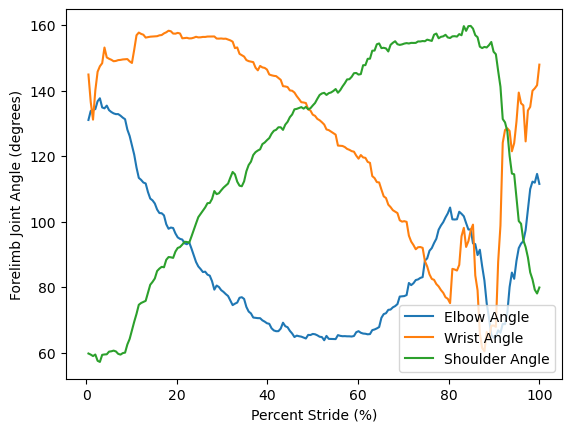

In [172]:
plt.figure(1)

plt.plot(p_stride1, elbow, label='Elbow Angle')
plt.plot(p_stride1, wrist, label='Wrist Angle')
plt.plot(p_stride1, shoulder, label='Shoulder Angle')
plt.xlabel('Percent Stride (%)')
plt.ylabel('Forelimb Joint Angle (degrees)')
plt.legend()
plt.show()

Vector Based 3D Joint Angle Calculations

Note: these calculations are used to varify the trig based calculations are correct
The results from vector based joint calculations will be (should be) identical to those performed via trig. in the section above, just cross varifying with matrix math. Here's a resource to understand the matrix math operations.
Forelimb Elbow Joint
A = shoulder point (X, Y, Z) = [pt4_X, pt4_Y, pt4_Z]
B = elbow point (X, Y, Z) = [pt2_X, pt2_Y, pt2_Z]
C = wrist point (X, Y, Z) = [pt3_X, pt3_Y, pt3_Z]

In [173]:
#np.array creates teh array and .T trsnaposes the original array  

A = np.array([pt4_X_s1, pt4_Y_s1, pt4_Z_s1]).T  #% shoulder
#A = np.transpose(A)
display(A)
B = np.array([pt2_X_s1, pt2_Y_s1, pt2_Z_s1]).T   #% elbow
print(B.shape)
C = np.array([pt3_X_s1, pt3_Y_s1, pt3_Z_s1]).T   #% wrist

print(C.shape)

array([[-1.3089889e+01,  5.4091077e+01,  7.0579872e+01],
       [-1.3047094e+01,  5.4124996e+01,  7.0586657e+01],
       [-1.2996292e+01,  5.4344594e+01,  7.0615487e+01],
       [-1.2941999e+01,  5.4578458e+01,  7.0646167e+01],
       [-1.2897702e+01,  5.4850277e+01,  7.0680575e+01],
       [-1.2860900e+01,  5.5044347e+01,  7.0705457e+01],
       [-1.2381262e+01,  5.5162732e+01,  7.0857484e+01],
       [-1.2206794e+01,  5.5284002e+01,  7.1001008e+01],
       [-1.1908329e+01,  5.5265460e+01,  7.1192899e+01],
       [-1.1770258e+01,  5.5260592e+01,  7.1320154e+01],
       [-1.1741784e+01,  5.5304397e+01,  7.1327046e+01],
       [-1.1721290e+01,  5.5343012e+01,  7.1332832e+01],
       [-1.1684917e+01,  5.5472684e+01,  7.1350271e+01],
       [-1.1646241e+01,  5.5626338e+01,  7.1370648e+01],
       [-1.1606686e+01,  5.5652044e+01,  7.1376020e+01],
       [-1.1564849e+01,  5.5683957e+01,  7.1382230e+01],
       [-1.1533829e+01,  5.5769378e+01,  7.1229187e+01],
       [-1.1074841e+01,  5.5762

(198, 3)
(198, 3)


Example Calculation 1
Determining the 2 vectors to characterize the 3D angle by making the elbow (or joint of interest) the origin. The elbow pt is set as the origin for the two vectors by subtracting the elbow point from the should and wrist point.

In [174]:
A0 = A - B #% vector from elbow (origin) to shoulder
#print(A0.shape)
B0 = B - B  #% origin (0,0,0)
#print(B0)
C0 = C - B  #% vector from elbow (origin) to wrist
print(C0)

[[10.848979  2.714715  1.916155]
 [10.882797  3.197577  2.246002]
 [11.246091  3.120279  3.380738]
 [11.443566  3.124283  4.034348]
 [11.126209  3.088156  4.070106]
 [11.14547   3.047091  4.275707]
 [11.355999  2.999538  4.315572]
 [11.479494  3.09452   4.078757]
 [11.16972   3.199738  3.98247 ]
 [11.173013  3.108148  3.971039]
 [11.174273  3.037358  3.962266]
 [11.177346  2.988954  3.956401]
 [11.174566  2.934713  3.949417]
 [11.039752  2.78531   3.992444]
 [10.900674  2.600876  4.197489]
 [10.850916  2.496059  4.182748]
 [10.832546  2.394478  4.169343]
 [10.818929  2.248882  4.250996]
 [10.813422  2.156419  4.30663 ]
 [10.813007  2.112552  4.301631]
 [10.805852  2.001256  4.287914]
 [10.769946  1.616714  4.236749]
 [10.727037  1.44927   4.214267]
 [10.729278  1.401846  4.2089  ]
 [10.729395  1.319835  4.199174]
 [10.733219  1.31871   4.19991 ]
 [10.727981  1.241679  4.190151]
 [10.725236  1.193119  4.184015]
 [10.721621  1.164302  4.180331]
 [10.717065  1.141362  4.177291]
 [10.70999

Calculating the angle between two vectors, using the following formula,
    a • b=a *b * cos (a) 

Which can be re-arranged to,
    a = arccos {(a • b)/ |a| * |b|}.


Using the algebraic formula for the dot product (the sum of the products of the vectors' components), and substitute in the magnitudes, the equation is:
    a = arccos((x_a * x_b+ y_a * y_b + z_a + z_b)/ √(x_a^2 + y_a^2 + z_a^2) * √x_b^2+y_b^2 +zb^2) 

In [175]:
dot_product = (A0[:,0] * C0[:,0]) + (A0[:,1] * C0[:,1]) + (A0[:,2] * C0[:,2])  #this gives the right results

# Calculate the magnitudes of A0 and C0 vectors
mag_A0 = np.sqrt(A0[:,0]**2 + A0[:,1]**2 + A0[:,2]) #in the matlab it does not have the ** (.^2)which gives different result, however based on the equation, there should be a **
mag_C0 = np.sqrt(C0[:,0]**2 + C0[:,1]**2 + C0[:,2]**2)

# Calculate the cosine of the angle between A0 and C0 vectors
cos_angle = dot_product / (mag_A0 * mag_C0)

# Calculate the angle in degrees using arccosine
alpha = np.degrees(np.arccos(cos_angle) )
#alpha = np.degrees(alpha_)

display(alpha)
print(alpha.shape)


array([134.8985536 , 137.97833643, 138.33289572, 138.78340583,
       143.2873476 , 146.19340668, 142.90135844, 142.82379815,
       143.49148072, 141.18827434, 140.39273457, 139.82213297,
       139.60613243, 139.37512165, 137.97575362, 137.17276869,
       136.9469595 , 132.6916053 , 130.36468773, 127.24294283,
       123.92363494, 119.42957779, 115.81879977, 115.12036449,
       114.18204102, 113.88973779, 110.93961843, 108.72233403,
       108.18491912, 107.13306962, 105.15336793, 103.97524676,
       103.9610464 , 103.2197431 , 100.19204995,  98.70586204,
        99.12581012,  98.80460669,  96.97567846,  95.66570786,
        95.16608197,  94.90859025,  93.66462105,  93.36741268,
        94.03118697,  91.93579201,  89.67419669,  87.48761197,
        85.97566689,  85.09579296,  84.09893777,  84.26227037,
        83.30515636,  82.96293502,  81.17895722,  78.51168196,
        79.84518909,  79.35204865,  78.35339825,  77.79589685,
        77.07344077,  76.45800291,  75.02670571,  73.58

(198,)


Example Calculation 2
Another way to perform this calculation, after determining the two vectors from their start and end point. Find the dot product of the two vectors

Finding the total length of the array allows us to calculate the dot product throughout the array.


//WILL LEAVE THIS HERE BC ITS NOT USED IN THE MATLAB SCRIPT BUT JUST IN CASE WE USE IT IN THE FUTURE 

    %[length,~] = size(A0);
    %c = dot(A0,C0,length);

Calculating the sum across the x, y, z pts/matrix rows to find the dot product. 2 sums across successive elements across rows.
    %VaVb_dotprod = sum(c,2);

Or, it might be best to perform the dot product as such


In [176]:
VaVb_dotprod = np.sum(A0 * C0, axis=1) 
display(VaVb_dotprod.shape)

(198,)

Next determine the magnitude of the vectors

    |Va| = √(Xa^2 + ya^2 + za^2)
    |Vb| = √(Xb^2 + yb^2 + zb^2)

In [177]:
A0_mag = np.sqrt(A0[:,0]**2+A0[:,1]** 2+A0[:,2]) #SHOULDNT TIS BE **2 ? BASED ON THE EQUATION
C0_mag = np.sqrt(C0[:,0]**2+C0[:,1]**2+C0[:,2]**2)

Finally, use the transformed dot product equation:

In [178]:
alpha2 = np.degrees(np.arccos(VaVb_dotprod/(A0_mag*C0_mag)))


Example Calculation 3
Setting up your two vectors, one originating from the elbow to the shoulder and the other originating from the elbow to the wrist.


Where,
Va = vector from the elbow to the shoulder (pt 4 and pt 3)
Vb = vector from the elbow to the wrist (pt 4 and pt 5).

In [179]:
Va = A-B;   #  shoulder pt minus elbow pt; vector from shoulder to elbow
display(Va)
Vb = C-B;   # wrist pt minus elbow pt; vector from wrist to elbow
display(Vb)

array([[ -4.347663,  -8.865379,  -3.374198],
       [ -4.399606,  -8.909074,  -3.350308],
       [ -4.400949,  -8.902695,  -3.3502  ],
       [ -4.393129,  -8.890722,  -3.415672],
       [ -4.680533,  -8.754616,  -4.009242],
       [ -4.780371,  -8.660725,  -4.500841],
       [ -4.338146,  -8.777353,  -4.579534],
       [ -4.297699,  -8.781511,  -4.656021],
       [ -4.351675,  -8.875119,  -4.585422],
       [ -4.229127,  -9.03504 ,  -4.478448],
       [ -4.209983,  -9.10907 ,  -4.486843],
       [ -4.197489,  -9.168045,  -4.493731],
       [ -4.167424,  -9.10364 ,  -4.484816],
       [ -4.2617  ,  -9.112802,  -4.423205],
       [ -4.363155,  -9.294053,  -4.215865],
       [ -4.370392,  -9.388703,  -4.227334],
       [ -4.360853,  -9.435721,  -4.398004],
       [ -3.915286,  -9.626361,  -4.184234],
       [ -3.602687,  -9.680868,  -4.135221],
       [ -3.046379,  -9.663858,  -4.115674],
       [ -2.567693,  -9.715807,  -4.107061],
       [ -2.176498,  -9.861624,  -4.1119  ],
       [ -

array([[10.848979,  2.714715,  1.916155],
       [10.882797,  3.197577,  2.246002],
       [11.246091,  3.120279,  3.380738],
       [11.443566,  3.124283,  4.034348],
       [11.126209,  3.088156,  4.070106],
       [11.14547 ,  3.047091,  4.275707],
       [11.355999,  2.999538,  4.315572],
       [11.479494,  3.09452 ,  4.078757],
       [11.16972 ,  3.199738,  3.98247 ],
       [11.173013,  3.108148,  3.971039],
       [11.174273,  3.037358,  3.962266],
       [11.177346,  2.988954,  3.956401],
       [11.174566,  2.934713,  3.949417],
       [11.039752,  2.78531 ,  3.992444],
       [10.900674,  2.600876,  4.197489],
       [10.850916,  2.496059,  4.182748],
       [10.832546,  2.394478,  4.169343],
       [10.818929,  2.248882,  4.250996],
       [10.813422,  2.156419,  4.30663 ],
       [10.813007,  2.112552,  4.301631],
       [10.805852,  2.001256,  4.287914],
       [10.769946,  1.616714,  4.236749],
       [10.727037,  1.44927 ,  4.214267],
       [10.729278,  1.401846,  4.2

Calculating the dot product

Dot product squares v's and take the same across the matrix

One way to calculate the dot product of the two vectors

In [180]:
dot_V = np.sum(Va * Vb, axis=1)

print(dot_V)


[-77.70016831 -83.89226756 -88.59851364 -91.83020276 -95.43024824
 -98.91377614 -95.3552942  -95.50074955 -95.26635235 -93.11842412
 -92.48907147 -92.09865348 -90.99813375 -90.0894879  -89.43005662
 -88.53938593 -88.16955426 -81.79491322 -77.64224937 -71.06003086
 -64.80065195 -56.80527973 -50.39706007 -49.31667879 -47.90630822
 -47.07206848 -41.66469355 -37.49502413 -36.38936603 -34.32778264
 -30.44587575 -28.16235743 -27.98498961 -26.55473164 -20.5359155
 -17.44331882 -18.07128529 -17.64029179 -14.06388438 -11.47456035
 -10.43382596  -9.87786982  -7.31338315  -6.62567111  -7.79863443
  -3.77108304   0.64125956   4.98441038   7.8728848    9.49981044
  11.33338502  11.75474591  13.78743048  14.36352431  18.04829594
  23.76700222  20.06080319  20.7984491   22.75616984  23.78316097
  24.97208202  26.15935755  29.14656604  32.32680887  30.61219939
  29.47043973  25.4631531   24.91062242  25.93959025  31.33696793
  34.82325996  36.05487578  38.98536566  38.9266834   38.98908785
  37.986123

Characterizing the vector magnitude for Va and Vb

In [181]:
sv_Va = Va*Va
dp_Va = np.sum((sv_Va), axis=1)
mag_Va = np.sqrt(dp_Va)

sv_Vb = Vb*Vb
dp_Vb = np.sum((sv_Vb), axis=1)
mag_Vb = np.sqrt(dp_Vb)

In [182]:
#Solving for theta:
theta_e = np.degrees(np.arccos(dot_V /(mag_Va *mag_Vb)))
display(theta_e)

array([131.016148  , 133.78107631, 134.08326846, 134.32755129,
       136.72206693, 137.6226166 , 134.83001433, 134.55799845,
       135.38304404, 134.00200569, 133.43105205, 133.02212198,
       132.79178225, 132.80014916, 132.32265495, 131.72053096,
       131.23333402, 128.07389339, 126.12105669, 123.32272913,
       120.39744213, 116.47515476, 113.34179351, 112.7331763 ,
       111.91766487, 111.63861302, 109.00743441, 107.02015557,
       106.46808655, 105.51176892, 103.67955282, 102.5990919 ,
       102.54687483, 101.89157038,  99.1753488 ,  97.80486974,
        98.18161492,  98.02752893,  96.37377127,  95.1821259 ,
        94.72442773,  94.51527967,  93.37432065,  93.09607095,
        93.70797408,  91.7833761 ,  89.69881197,  87.67677791,
        86.30680694,  85.51282315,  84.6037834 ,  84.71328059,
        83.81259739,  83.50143011,  81.79583761,  79.22989315,
        80.48315455,  80.0284354 ,  79.07375948,  78.54210006,
        77.86736537,  77.28418244,  75.91853236,  74.50

Hindlimb Knee Joint

Points to generate vectors
D = hip point (X, Y, Z) = [pt7_X, pt7_Y, pt7_Z]
E = knee point (X, Y, Z) = [pt5_X, pt5_Y, pt5_Z]
F = ankle point (X, Y, Z) = [pt6_X, pt6_Y, pt6_Z]

In [183]:
D = np.array([pt7_X_s1, pt7_Y_s1, pt7_Z_s1]).T  #hip
display(D)
E = np.array([pt5_X_s1, pt5_Y_s1, pt5_Z_s1]).T    #knee
display(E)
F = np.array([pt6_X_s1, pt6_Y_s1, pt6_Z_s1]).T    #ankle
print(F)

array([[-42.480322,  52.388633,  66.62912 ],
       [-42.252849,  52.363345,  66.574604],
       [-42.234747,  52.369198,  66.549254],
       [-41.869682,  52.852388,  66.669014],
       [-41.614914,  52.933284,  66.725585],
       [-41.43077 ,  53.149338,  66.880551],
       [-41.32581 ,  53.144328,  66.885608],
       [-41.242316,  53.238299,  66.911648],
       [-41.220803,  53.333547,  66.949667],
       [-41.19153 ,  53.330639,  66.954562],
       [-40.939097,  53.323687,  66.954968],
       [-40.911943,  53.372211,  66.965496],
       [-40.828158,  53.365881,  66.975273],
       [-40.818401,  53.364934,  66.976889],
       [-40.691612,  53.354808,  67.003843],
       [-40.515757,  53.534475,  67.09771 ],
       [-40.515757,  53.534475,  67.09771 ],
       [-40.336457,  53.57232 ,  67.135208],
       [-40.103849,  53.699153,  67.234493],
       [-40.08433 ,  53.6974  ,  67.237685],
       [-40.065133,  53.850769,  67.25475 ],
       [-39.964046,  53.948734,  67.271049],
       [-3

array([[-42.744714,  62.53353 ,  72.008735],
       [-42.672075,  62.506615,  71.975362],
       [-42.672075,  62.506615,  71.975362],
       [-42.672075,  62.506615,  71.975362],
       [-42.672075,  62.506615,  71.975362],
       [-42.672075,  62.506615,  71.975362],
       [-42.672075,  62.506615,  71.975362],
       [-42.644838,  62.949047,  72.036871],
       [-42.644838,  62.949047,  72.036871],
       [-42.644838,  62.949047,  72.036871],
       [-42.644838,  62.949047,  72.036871],
       [-42.644838,  62.949047,  72.036871],
       [-42.627606,  63.194721,  72.071388],
       [-42.609749,  63.638469,  72.131331],
       [-42.609749,  63.638469,  72.131331],
       [-42.609749,  63.638469,  72.131331],
       [-42.609749,  63.638469,  72.131331],
       [-42.590301,  63.834565,  72.159872],
       [-42.573045,  64.080476,  72.194379],
       [-42.340125,  64.197487,  72.326929],
       [-42.147049,  64.21657 ,  72.445911],
       [-42.147049,  64.21657 ,  72.445911],
       [-4

[[-52.149068  54.476672  68.632958]
 [-52.115222  54.461201  68.596014]
 [-52.115222  54.461201  68.596014]
 [-52.115222  54.461201  68.596014]
 [-52.115222  54.461201  68.596014]
 [-52.115222  54.461201  68.596014]
 [-51.841414  54.541667  68.254981]
 [-51.841414  54.541667  68.254981]
 [-51.841414  54.541667  68.254981]
 [-51.841414  54.541667  68.254981]
 [-51.7432    54.3199    68.290478]
 [-51.104098  54.430433  68.089553]
 [-51.025333  54.340077  68.09515 ]
 [-50.98098   54.332089  68.10372 ]
 [-50.98098   54.332089  68.10372 ]
 [-50.98098   54.332089  68.10372 ]
 [-50.98098   54.332089  68.10372 ]
 [-50.98098   54.332089  68.10372 ]
 [-50.98098   54.332089  68.10372 ]
 [-50.98098   54.332089  68.10372 ]
 [-50.98098   54.332089  68.10372 ]
 [-50.301949  54.333283  68.063066]
 [-50.101843  54.203432  67.880481]
 [-49.851097  54.200047  67.87951 ]
 [-49.424803  54.221177  67.764371]
 [-49.358455  54.210639  67.777168]
 [-49.33124   54.244478  67.787176]
 [-49.231995  54.419375  67.

Generating Vectors

Vc = vector from the knee to the hip (pt 8 and pt 7)
Vd = vector from the knee to the ankle (pt 8 and pt 9)

In [184]:
Vc = D-E    # pt6- pt7; vector from hip to knee
Vd = F-E    # pt8-pt7; vector from ankle to knee

Calculating the dot product for vectors Vc and Vd

In [185]:
VcVd_dotprod = np.sum(Vc*Vd,axis=1)
display(VcVd_dotprod)

array([ 97.40993918,  95.89903447,  95.76667128,  88.02713452,
        84.77930793,  80.77848115,  81.16159302,  88.12657797,
        86.98416222,  86.72088716,  86.5780031 ,  86.94068969,
        92.18297219, 101.37372004, 100.29801621,  96.77578425,
        96.77578425,  98.98625623, 100.72951701, 105.58848085,
       106.61007332, 106.35841693, 112.80111191, 115.60828815,
       123.48812821, 124.17324519, 121.60362838, 114.00181636,
       110.01501506, 115.66750808, 112.5065815 , 109.01934385,
       115.48670427, 114.6356229 , 119.82180946, 118.15922282,
       114.10448536, 114.10448536, 107.39882737, 106.45963482,
       106.97553694, 104.68170959, 101.75098598, 100.92016248,
        97.32163619,  97.17208563,  94.47976665,  87.11847169,
        87.83560751,  84.54366655,  80.47382421,  79.80028216,
        75.98658041,  74.72100841,  72.72971494,  68.53107771,
        70.790212  ,  70.790212  ,  70.8650251 ,  70.69820211,
        70.49595336,  66.24335555,  61.32562932,  57.47

Next determine the magnitude of the vectors
    |Vc| = √(xc^2 + yc^2 + zc^2)
    |Vc| = √(xd^2 + yd^2 + zd^2)

In [186]:
Vc_mag = np.sqrt(Vc[:,0]**2+Vc[:,1]**2+Vc[:,2]) #missing the **2 at the end?
Vd_mag = np.sqrt(Vd[:,0]**2+Vd[:,1]**2+Vd[:,2]**2)

In [187]:
#Finally, use the transformed dot product equation:
    
beta = np.degrees(np.arccos(VcVd_dotprod/(Vc_mag*Vd_mag)))

Old Way
Calculating the dot product; squares v's and take the same across the matrix

In [188]:
dot_V = np.sum((Vc*Vd), axis=1)

Calculating the product of the vector magnitude

/var/folders/nv/ymy6nb1d6wq1m3352zph86040000gn/T/ipykernel_58621/3016443894.py:19: UserWarning: Legend does not support 'E' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Elbow Angle','Knee Angle')
/var/folders/nv/ymy6nb1d6wq1m3352zph86040000gn/T/ipykernel_58621/3016443894.py:19: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Elbow Angle','Knee Angle')
/var/folders/nv/ymy6nb1d6wq1m3352zph86040000gn/T/ipykernel_58621/3016443894.py:19: UserWarning: Legend does not support 'b' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Elbow Angle','Kn

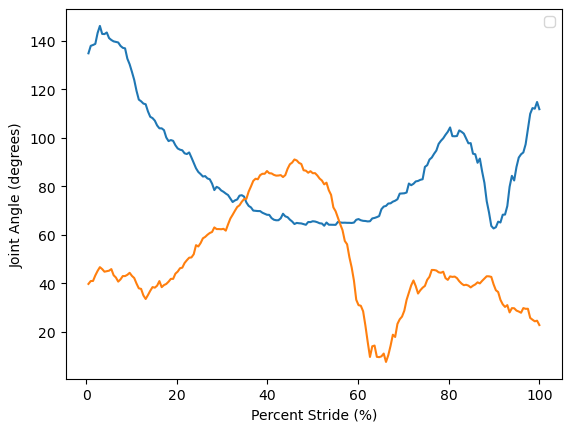

In [189]:
sv_Vc = Vc*Vc
dp_Vc = np.sum((sv_Vc), axis=1)
mag_Vc = np.sqrt(dp_Vc)
sv_Vd = Vd*Vd
dp_Vd = np.sum((sv_Vd),axis=1)
mag_Vd = np.sqrt(dp_Vd)
theta_k = np.degrees(np.arccos(dot_V/(mag_Vc*mag_Vd)))

#% Graphing FL & HL 3D Joint Angles (using matrix math)
#% FIXIT something weird here with graph imaginary numbers

#% Displaying |elbow| and |knee| angle over time.

#this figure has been comented out in matlab but it appears to be okay here 
plt.figure(2)
plt.plot(p_stride1,alpha2,p_stride1, beta)
plt.xlabel('Percent Stride (%)')
plt.ylabel('Joint Angle (degrees)')
plt.legend('Elbow Angle','Knee Angle')
plt.show()

Finding Angle Measurements in the Hindlimb

In this section we use the distance formula defined in the forelimb joint angle section to calculate hindlimb joint angles. Here, k will indicate knee angle, h will indicate hip angle, and a will indicate ankle angle.

Distance Between Hip and Knee (d_hk)

In [190]:
d_hk = np.sqrt((pt7_X_s1-pt5_X_s1)**2+(pt7_Y_s1-pt5_Y_s1)**2+(pt7_Z_s1-pt5_Z_s1)**2)
display(d_hk)

97     11.486039
98     11.499124
99     11.506569
100    11.045599
101    10.969340
         ...    
290    12.461868
291    12.497946
292    12.511062
293    12.335208
294    11.689430
Length: 198, dtype: float64

Distance Between Knee and Ankle (d_ka)

In [191]:
d_ka = np.sqrt((pt6_X_s1-pt5_X_s1)**2+(pt6_Y_s1-pt5_Y_s1)**2+(pt6_Z_s1-pt5_Z_s1)**2)
display(d_ka)

97     12.835525
98     12.857749
99     12.857749
100    12.857749
101    12.857749
         ...    
290    16.179452
291    16.340430
292    16.452359
293    16.452359
294    15.928056
Length: 198, dtype: float64

Distance Between Hip and Ankle (d_ha)

In [192]:
d_ha = np.sqrt((pt7_X_s1-pt6_X_s1)**2+(pt7_Y_s1-pt6_Y_s1)**2+(pt7_Z_s1-pt6_Z_s1)**2)
display(d_ha)

97     10.092568
98     10.283652
99     10.304828
100    10.548587
101    10.774484
         ...    
290     9.647862
291     9.739590
292     9.770355
293     9.867046
294     9.547478
Length: 198, dtype: float64

Distance Between Ankle and Phalange (TMT joint) (d_ap)


In [193]:
d_ap = np.sqrt((pt9_X_s1-pt6_X_s1)**2+(pt9_Y_s1-pt6_Y_s1)**2+(pt9_Z_s1-pt6_Z_s1)**2)
display(d_ap)

97     9.537638
98     9.538629
99     9.538629
100    9.498822
101    9.498822
         ...   
290    8.955043
291    8.854247
292    8.854247
293    8.854247
294    8.749361
Length: 198, dtype: float64

Distance Between Knee and Phalange (TMT joint) (d_kp)


In [194]:
d_kp = np.sqrt((pt9_X_s1-pt5_X_s1)**2+(pt9_Y_s1-pt5_Y_s1)**2+(pt9_Z_s1-pt5_Z_s1)**2)
display(d_kp)

97     11.197062
98     11.242998
99     11.242998
100    11.162373
101    11.162373
         ...    
290    14.568348
291    14.582784
292    14.721149
293    14.721149
294    14.721149
Length: 198, dtype: float64

Distance Between Knee and Shoulder (d_ks)

In [195]:
d_ks = np.sqrt((pt4_X_s1-pt5_X_s1)**2+(pt4_Y_s1-pt5_Y_s1)**2+(pt4_Z_s1-pt5_Z_s1)**2)
display(d_ks)

97     30.866249
98     30.819142
99     30.807790
100    30.797725
101    30.770266
         ...    
290    29.182053
291    29.185208
292    29.163728
293    29.185122
294    29.584091
Length: 198, dtype: float64

d_he distance between hip and shoulder has been previously defined for the forelimband can be used to calculate the hip angle here.

The following equations were used to calculate the hindlimb joint angles:

    adj_h = arccos((d_hs^2 + d_hk^2 - d_ks^2)/ 
    (2 * d_hs * d_hk))

    K = arccos((d_ka^2 + d_hk^2 - d_ha^2)/ 
    (2 * d_ka * d_hk))

    A = arccos((d_ka^2 + d_ap^2 - d_kp^2)/ 
    (2 * d_ka * d_ap))


Note: the hip was calculated from the adjacent angle created from the shoulder, knee, and ankle points.


In [196]:
adj_hip = np.degrees(np.arccos((d_hs**2 + d_hk**2 - d_ks**2) / (2 * d_hs * d_hk)))
display(adj_hip)
hip = 180-adj_hip
display(hip)
knee = np.degrees(np.arccos((d_hk**2 + d_ka**2 - d_ha**2) / (2 * d_hk * d_ka)))
display(knee)
ankle = np.degrees(np.arccos(((d_ka**2 + d_ap**2 - d_kp**2) / (2 * d_ka * d_ap))))
display(ankle)                 

97     84.828276
98     85.390231
99     85.062195
100    87.417712
101    88.425517
         ...    
290    71.618770
291    70.798163
292    69.972044
293    70.397420
294    71.618781
Length: 198, dtype: float64

97      95.171724
98      94.609769
99      94.937805
100     92.582288
101     91.574483
          ...    
290    108.381230
291    109.201837
292    110.027956
293    109.602580
294    108.381219
Length: 198, dtype: float64

97     48.644974
98     49.563017
99     49.661882
100    51.697347
101    53.051507
         ...    
290    36.539542
291    36.495639
292    36.307508
293    36.688442
294    36.538430
Length: 198, dtype: float64

97     57.835118
98     58.022603
99     58.022603
100    57.581664
101    57.581664
         ...    
290    63.404171
291    62.692668
292    62.978580
293    62.978580
294    65.960350
Length: 198, dtype: float64

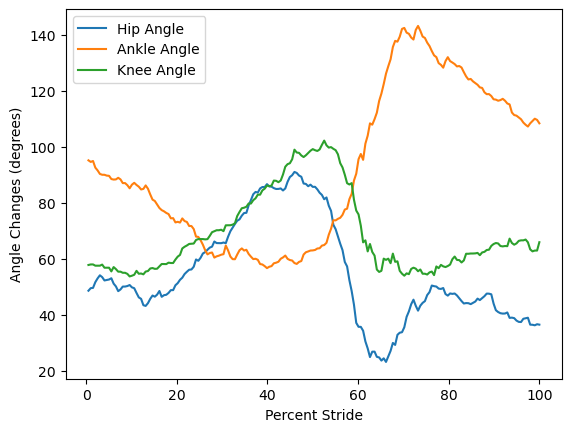

"saving graph as vector image\n%    graphname4 = append(walk_seq, '_HLjointgraph.pdf');\n%    ax1 = gca;\n%    exportgraphics(ax1, graphname4,'ContentType','vector');"

In [197]:
# Graphing HL 3D Joint Angles (using trig)
# *TODO graph for only contact time/period*

plt.figure(3)
plt.plot(p_stride1,knee,p_stride1, hip,p_stride1,ankle)
plt.xlabel('Percent Stride')
plt.ylabel('Angle Changes (degrees)')
plt.legend({'Knee Angle','Hip Angle','Ankle Angle'})
plt.show()
   
"""saving graph as vector image
%    graphname4 = append(walk_seq, '_HLjointgraph.pdf');
%    ax1 = gca;
%    exportgraphics(ax1, graphname4,'ContentType','vector');"""

Analysing Force Plate Data

This code analyzes the ground reaction force data that was taken as the frogs walked across a force plate.

Conversion from video time to ground reaction force time

Finding where the force data is based upon the tiggered video time calculated in the above section.
If else statements are used to address issues with data wrap around. For example, if the trigger occurs earlier in the data sequence than the forces/stride sequence this suggests the data has wrapped around in time.
Executes the following, if trigger occurs before s1_start in force time, if not, executes else function

In [198]:
#POTENTIAL ISSUE: start startf_s1_sec is at 97 rn bc -1 but it makes delta_s1_start be slight;y diffe from 2.3200(matlab) to 2.3240 python, not ure how itll affect 
if trigger_t < delta_s1_start:
    s1_start_force_t = trigger_t-delta_s1_start+(igor_sr/1000) #delta_s1_start has the wrong result
else:
    s1_start_force_t = trigger_t-delta_s1_start
    
print(s1_start_force_t, trigger_t, delta_s1_start)
    

8.5474 0.8714 2.3240000000000003


Executes the following, if trigger occurs before s1_end in force time, if not, executes else function

In [199]:
if trigger_t < delta_s1_end: 
    s1_end_force_t = trigger_t-delta_s1_end+(igor_sr/1000)
else:
    s1_end_force_t = trigger_t-delta_s1_end

print(s1_end_force_t, trigger_t, delta_s1_end) #delta_s1_end is 1.5320 (matlab), makes s1_end_force_t be different to 9.3394


#is commented out in matlab code
"""% % executes the following if only trigger is wrapped around
% if trigger_t < delta_s1_start %&& trigger_t < delta_s1_end
%
%
% % executes the following if only trigger and part of the start force wrap around
% elseif trigger_t < delta_s1_start && trigger_t < delta_s1_end %||
%     s1_start_force_t = trigger_t-delta_s1_start+(igor_sr/1000);
%     s1_end_force_t = trigger_t-delta_s1_end;
% % executes if trigger is not wrapped around and all the force data is
% % inline  Ideal one to use
% else
%
%
% end""" 

9.3354 0.8714 1.5360000000000003


'% % executes the following if only trigger is wrapped around\n% if trigger_t < delta_s1_start %&& trigger_t < delta_s1_end\n%\n%\n% % executes the following if only trigger and part of the start force wrap around\n% elseif trigger_t < delta_s1_start && trigger_t < delta_s1_end %||\n%     s1_start_force_t = trigger_t-delta_s1_start+(igor_sr/1000);\n%     s1_end_force_t = trigger_t-delta_s1_end;\n% % executes if trigger is not wrapped around and all the force data is\n% % inline  Ideal one to use\n% else\n%\n%\n% end'

Executes the following, if trigger occurs before fl_end in force time, if not, executes else function

In [200]:
if trigger_t < delta_fl_end: 
    fl_end_force_t = trigger_t-delta_fl_end+(igor_sr/1000)
else:
    fl_end_force_t = trigger_t-delta_fl_end
    
print(fl_end_force_t, trigger_t, delta_fl_end)#this are the same results as matlab 

9.2394 0.8714 1.6320000000000001


Executes the following, if trigger occurs before fl_only_end in force time, if not, executes else function

In [201]:
if trigger_t < delta_fl_only_end:
    fl_only_end_force_t = trigger_t-delta_fl_only_end+(igor_sr/1000)
else:
    fl_only_end_force_t = trigger_t-delta_fl_only_end
    
print(fl_only_end_force_t, trigger_t, delta_fl_only_end, igor_sr) #same as matlab


9.1114 0.8714 1.7600000000000002 10000


Executes the following. If the trigger occurs before hl_only_starts when is in contact, if not, execute else function

In [202]:
if trigger_t < delta_hl_only_start:
    hl_start_force_t_only = trigger_t-delta_hl_only_start+(igor_sr/1000)
    #%elseif delta_hl_only_start < delta_s1_start
    #%    hl_start_force_t_only = trigger_t-delta_hl_only_start+(igor_sr/1000);
else:
    hl_start_force_t_only = trigger_t-delta_hl_only_start

print(hl_start_force_t_only, trigger_t, delta_hl_only_start) #same as matlab

9.2434 0.8714 1.6280000000000001


Executes the following, if trigger occurs before hl_on in force time, if not, executes else function

In [203]:
if trigger_t < delta_hl_on:
    hl_on_force_t = trigger_t-delta_hl_on+(igor_sr/1000)
else:
    hl_on_force_t = trigger_t-delta_hl_on
    
print(hl_on_force_t, trigger_t, delta_hl_on) #same as matlab


9.1154 0.8714 1.7560000000000002


Executes the following, if trigger occurs before hl_end in force time, if not, executes else funtion

In [204]:
if trigger_t < delta_hl_end:
    hl_end_force_t = trigger_t-delta_hl_end+(igor_sr/1000)
    #%elseif trigger_t > delta_hl_end && trigger_t < delta_hl_on
    #%    hl_end_force_t = trigger_t-delta_hl_end+(igor_sr/1000);
else:
    hl_end_force_t = trigger_t-delta_hl_end

print(hl_end_force_t, trigger_t, delta_hl_end)

8.1594 0.8714 2.712


Executes the following, if trigger occurrs before start of stride 2, if not, executes else function

In [205]:
if endf_s2_sec != 0 or startf_s2_sec != 0:
    if trigger_t < delta_s2_start:
        s2_start_force_t = trigger_t-delta_s2_start+(igor_sr/1000)
    else:
        s2_start_force_t = trigger_t-delta_s2_start
        
print(s2_start_force_t, trigger_t, delta_s2_start) #same as matlab     


9.343399999999999 0.8714 1.5280000000000002


Executes the following, if trigger occurs before end of stride 2, if not, executes else function

In [206]:
#CHECK AGAIN WITH HL INFO
if endf_s2_sec != 0:
    if trigger_t < delta_s2_end:
        s2_end_force_t = trigger_t-delta_s2_end+(igor_sr/1000);
    else:
        #%elseif trigger_t > delta_s2_end
        #%s2_end_force_t = trigger_t-delta_s2_end+(igor_sr/1000);
        s2_end_force_t = trigger_t-delta_s2_end
    print(delta_s2_end)   
    print(s2_end_force_t, trigger_t, delta_s2_end) #does not show anything cause there is no info 
 

Finding the column in the igor file that each event corresponds to:

Note: 10,000 corresponds to the sampling rate in Igor, 10,000 samples/sec

In [207]:
#%I think thsi tod is not necessary now - TODO this might be our issue I think jenifer added this in there?
fl_only_end_force_c = np.round(fl_only_end_force_t *10000,4)
print(fl_only_end_force_c)
hl_only_start_force_c = np.round(hl_start_force_t_only *10000,4)
print(hl_only_start_force_c)
s1_start_force_c = np.round(s1_start_force_t*10000,4)
print(s1_start_force_c, s1_start_force_t) #this is not the same as matlab(85514)
s1_end_force_c = np.round(s1_end_force_t*10000,4)
print("s1_end_force_c" ,s1_end_force_c) #this is not the same as matlab(93394)
fl_end_force_c = np.round(fl_end_force_t*10000,4)
print(fl_end_force_c)
hl_on_force_c = np.round(hl_on_force_t*10000,4)
print(hl_on_force_c)
hl_end_force_c = np.round(hl_end_force_t*10000,4)
print(hl_end_force_c)

if startf_s2_sec != 0:
    s2_start_force_c = round(s2_start_force_t * 10000,4)

print(s2_start_force_c)



91114.0
92434.0
85474.0 8.5474
s1_end_force_c 93354.0
92394.0
91154.0
81594.0
93434.0


In [208]:
#chechk again with HL info
if endf_s2_sec != 0:
    s2_end_force_c = round(s2_end_force_t *10000,4)
    print(s2_end_force_c)

Setting up force time for FL and HL

Defining the time scale for force across different events, from:
    stride 1-stride 2
    FL only stride cycle time
    HL only stride cycle time
    Overlapp between FL and HL

Syncronizing force time with video time for FL

In [209]:
fl_only_f_t = np.arange(s1_start_force_c, fl_only_end_force_c + 1)/1000
print(s1_start_force_c, fl_only_end_force_c) # s1_start_force_c is causing the mismatch results 

print(fl_only_f_t.shape) # pyt is 5641 and matlab is 5601, bc it starts at 97 it takes about 40 ore rows bac of the time 
print(fl_only_f_t)
fl_only_f_sec = fl_only_f_t - fl_only_f_t[0] #% time starts at zero

print(fl_only_f_sec.shape)
 # i think its okay that it takes another amount becasue since its 97/250 its only the time that is diffrent 

85474.0 91114.0
(5641,)
[85.474 85.475 85.476 ... 91.112 91.113 91.114]
(5641,)


Syncronizing force time with video time for HL

In [210]:
#check with Hl INFO
if startf_s2_sec != 0 and endf_s2_sec != 0:
    hl_only_f_t = np.arange((hl_only_start_force_c, hl_end_force_c))/1000
    print(hl_only_f_t)
    hl_only_f_sec = hl_only_f_t - hl_only_f_t[0]  # time starts at zero


Characterizing Percent Stride for force data


In [211]:
f_diff_s1_start = s1_start_force_c - s1_start_force_c + 1
print(f_diff_s1_start)
f_diff_s1_end = s1_end_force_c - s1_start_force_c + 1
print(f_diff_s1_end)
f_diff_fl_only_end = fl_only_end_force_c - s1_start_force_c + 1
print(f_diff_fl_only_end) #takes 40 sec after matlab so instead of 5601 is 5641
f_diff_hl_start = hl_on_force_c - s1_start_force_c + 1
print(f_diff_hl_start) #takes 40 sec after matlab so instead of 5641 is 5681


#basically this are all different numbers 
if fl_end_force_c < s1_start_force_c:
    f_diff_fl_end = fl_end_force_c + 100000 - s1_start_force_c + 1
    
else:
    f_diff_fl_end = fl_end_force_c - s1_start_force_c + 1
print('f_diff_fl_end',f_diff_fl_end)

if hl_only_start_force_c < s1_start_force_c:
    f_diff_hl_only_start = hl_only_start_force_c + 100000 - s1_start_force_c + 1
else:
    f_diff_hl_only_start = hl_only_start_force_c - s1_start_force_c + 1

print('f_diff_hl_only_start',f_diff_hl_only_start)
if s2_start_force_c < s1_start_force_c:
    f_diff_s2_start = s2_start_force_c + 100000 - s1_start_force_c + 1
else:
    f_diff_s2_start = s2_start_force_c - s1_start_force_c + 1
print("f_diff_s2_start", f_diff_s2_start)

if hl_end_force_c < s1_start_force_c:
    f_diff_hl_end = hl_end_force_c + 100000 - s1_start_force_c + 1
else:
    f_diff_hl_end = hl_end_force_c - s1_start_force_c + 1
print("f_diff_hl_end", f_diff_hl_end)

if HL == 1:
    if s2_end_force_c < s1_start_force_c:
        f_diff_s2_end = s2_end_force_c + 100000 - s1_start_force_c + 1
    else:
        f_diff_s2_end = s2_end_force_c - s1_start_force_c + 1


1.0
7881.0
5641.0
5681.0
f_diff_fl_end 6921.0
f_diff_hl_only_start 6961.0
f_diff_s2_start 7961.0
f_diff_hl_end 96121.0


Define time over 2 strides

size finds the array size from the start of the stride to the end using the first and last frame of the strides

In [212]:
#matches atlab
if HL == 1:
    forcesize = f_diff_s2_end - f_diff_s1_start + 1
elif HL == 0:
    forcesize = f_diff_s1_end - f_diff_s1_start + 1
print(forcesize)

7881.0


Calculates the percent stride array use to standardize across different walking trials, changes the time component usually at the x-axis values to plot y-axis variables of interest (e.g. force, torques, etc.) since every stride is going to be a different length in time.

In [213]:
forcestride1 =np.arange (f_diff_s1_start, f_diff_fl_end + 1)
s1_size = len(forcestride1)
print(forcestride1.shape)
print(s1_size)

p_forcestride1 = np.round(forcestride1 / s1_size * 100,4)
print(p_forcestride1)

if HL == 1:   
    forcestride2 = np.arange(f_diff_fl_end+1,f_diff_s2_end + 1)
    s2_size, _ = len(forcestride2)
    p_forcestride2 = np.round(forcestride2 / s2_size * 100,4)
    p_forcestrides_all = np.concatenate(1,p_forcestride1,p_forcestride2)

    print(p_forcestrides_all)
elif HL == 0:
    p_forcestrides_all = p_forcestride1


p_force_flonly = p_forcestrides_all[int(f_diff_s1_start): int(f_diff_fl_only_end + 1)]
print(p_force_flonly)
if HL == 1:
    p_force_hlonly = p_forcestrides_all[f_diff_hl_only_start:f_diff_hl_end + 1]


(6921,)
6921
[1.44000e-02 2.89000e-02 4.33000e-02 ... 9.99711e+01 9.99856e+01
 1.00000e+02]
[2.89000e-02 4.33000e-02 5.78000e-02 ... 8.14911e+01 8.15056e+01
 8.15200e+01]


Importing force data set

In [214]:



file = walk_seq + '_force_data.txt'
txt_file = '/Users/jenifer_dubon/Desktop/walking_frog_force/walking_frog_force/Datasets/' + file
display(txt_file)
datavalues_ = pd.read_table(txt_file) #it also works with np.loadtxt but read tablw might be best becaus eit also shows the index to make sure thoese are the right values
datavalues = datavalues_.round(4)
display(datavalues.head())

'/Users/jenifer_dubon/Desktop/walking_frog_force/walking_frog_force/Datasets/20210706_pb4_walk2_force_data.txt'

,Fx_SS,Fy_SS,Fz_SS,Mx,My,Mz,Fr_SS,trigger
0,0.0033,-0.0024,0.0183,-0.0064,-0.0056,0.0006,0.0188,4.2046
1,0.0033,-0.0024,0.0183,-0.0064,-0.0056,0.0006,0.0187,4.2036
2,0.0033,-0.0023,0.0183,-0.0064,-0.0057,0.0006,0.0187,4.2039
3,0.0033,-0.0023,0.0183,-0.0064,-0.0057,0.0007,0.0187,4.2081
4,0.0033,-0.0023,0.0183,-0.0064,-0.0056,0.0006,0.0187,4.2181


Extracting Force Data for Forelimb only data (for trials w/overlap)

If data is wrapped around the if else statements will pull out particular chunks and adds them together using cat().

In [215]:
print(s1_start_force_c, fl_only_end_force_c )

if trigger_t < delta_s1_start and trigger_t < delta_fl_only_end:
    s1_start_force_c = int(s1_start_force_c)
    fl_only_end_force_c = int(fl_only_end_force_c)
    
    f_x_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 0]
    f_y_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 1]
    f_z_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 2]
    m_x_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 3]
    m_y_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 4]
    m_z_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 5]
    f_r_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 6]
    trigger_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 7]
    
    
    #% executes the following section if all data except stride start wraps around
elif trigger_t < delta_s1_start and trigger_t > delta_fl_only_end:   # added && 1/3/21
    f_x1_flonly = datavalues[s1_start_force_c:end + 1, 0]; #end + 1? it hasnt been specified 
    f_y1_flonly = datavalues.iloc[s1_start_force_c:end + 1, 1] #end of what?? of stride i guess 
    f_z1_flonly = datavalues.iloc[s1_start_force_c:end + 1, 2]
    m_x1_flonly = datavalues.iloc[s1_start_force_c:end + 1, 3]
    m_y1_flonly = datavalues.iloc[s1_start_force_c:end + 1, 4]
    m_z1_flonly = datavalues.iloc[s1_start_force_c:end + 1, 5]
    f_r1_flonly = datavalues.iloc[s1_start_force_c:end + 1, 6]
    trigger1_flonly = datavalues.iloc[s1_start_force_c:end + 1, 7]
    
    f_x2_flonly = datavalues.iloc[1:fl_only_end_force_c+ 1, 0]
    f_y2_flonly = datavalues.iloc[1:fl_only_end_force_c+ 1, 1]
    f_z2_flonly = datavalues.iloc[1:fl_only_end_force_c+ 1, 2]
    m_x2_flonly = datavalues.iloc[1:fl_only_end_force_c+ 1, 3]
    m_y2_flonly = datavalues.iloc[1:fl_only_end_force_c+ 1, 4]
    m_z2_flonly = datavalues.iloc[1:fl_only_end_force_c+ 1, 5]
    f_r2_flonly = datavalues.iloc[1:fl_only_end_force_c+ 1, 6]
    trigger2_flonly = datavalues.iloc[1:fl_only_end_force_c+ 1, 7]
    
    f_x_flonly = np.concatenate(1,f_x1_flonly,f_x2_flonly)
    print(f_x_flonly)
    f_y_flonly = np.concatenate(1,f_y1_flonly,f_y2_flonly)
    f_z_flonly = np.concatenate(1,f_z1_flonly,f_z2_flonly)
    m_x_flonly = np.concatenate(1,m_x1_flonly,m_x2_flonly)
    m_y_flonly = np.concatenate(1,m_y1_flonly,m_y2_flonly)
    m_z_flonly = np.concatenate(1,m_y1_flonly,m_y2_flonly)
    f_r_flonly = np.concatenate(1,f_r1_flonly,f_r2_flonly)
    trigger_flonly = np.concatenate(1,trigger1_flonly,trigger2_flonly)
    
    #% executes if data is normal and trigger is at the end of the force trace
elif trigger_t > delta_s1_start and trigger_t > delta_fl_only_end:
    f_x_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 0]
    f_y_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 1]
    f_z_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 2]
    m_x_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 3]
    m_y_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 4]
    m_z_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 5]
    f_r_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 6]
    trigger_flonly = datavalues.iloc[s1_start_force_c:fl_only_end_force_c + 1, 7]

    
    
display(trigger_flonly.head())
#print(f_x_flonly, f_x_flonly.shape)
    

85474.0 91114.0


85474    4.2188
85475    4.2210
85476    4.2226
85477    4.2258
85478    4.2262
Name: trigger, dtype: float64

Extracting Force Data for the Hindlimb only data (for trials w/overlap)

If data is wrapped around the if else statements will pull out particular chunks and add them together using cat().

In [216]:
#CHECK WITH HL INFO

if trigger_t < delta_hl_only_start and trigger_t < delta_hl_end:
    hl_only_start_force_c = int(hl_only_start_force_c)
    hl_end_force_c = int(hl_end_force_c)
    
    
    f_x_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 0]
    f_y_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 1]
    f_z_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 2]
    m_x_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 3]
    m_y_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 4]
    m_z_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 5]
    f_r_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 6]
    trigger_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 7]
    
    #% executes the following section if all data except stride start wraps around
elif trigger_t < delta_hl_only_start and trigger_t > delta_hl_end:   # added and 1/3/21
    f_x1_hlonly = datavalues.iloc[hl_only_start_force_c:end, 0] #where does end come from?
    f_y1_hlonly = datavalues.iloc[hl_only_start_force_c:end, 1]
    f_z1_hlonly = datavalues.iloc[hl_only_start_force_c:end, 2]
    m_x1_hlonly = datavalues.iloc[hl_only_start_force_c:end, 3]
    m_y1_hlonly = datavalues.iloc[hl_only_start_force_c:end, 4]
    m_z1_hlonly = datavalues.iloc[hl_only_start_force_c:end, 5]
    f_r1_hlonly = datavalues.iloc[hl_only_start_force_c:end, 6]
    trigger1_hlonly = datavalues.iloc[hl_only_start_force_c:end, 7]
    
    hl_end_force_c_wrap = hl_end_force_c-(igor_sr)
    
    f_x2_hlonly = datavalues.iloc[1:hl_end_force_c_wrap + 1, 0]
    f_y2_hlonly = datavalues.iloc[1:hl_end_force_c_wrap + 1, 1]
    f_z2_hlonly = datavalues.iloc[1:hl_end_force_c_wrap + 1, 2]
    m_x2_hlonly = datavalues.iloc[1:hl_end_force_c_wrap + 1, 3]
    m_y2_hlonly = datavalues.iloc[1:hl_end_force_c_wrap + 1, 4]
    m_z2_hlonly = datavalues.iloc[1:hl_end_force_c_wrap + 1, 5]
    f_r2_hlonly = datavalues.iloc[1:hl_end_force_c_wrap + 1, 6]
    trigger2_hlonly = datavalues.iloc[1:hl_end_force_c_wrap + 1, 7]
    
    f_x_hlonly = np.concatenate(1,f_x1_hlonly,f_x2_hlonly)
    f_y_hlonly = np.concatenate(1,f_y1_hlonly,f_y2_hlonly)
    f_z_hlonly = np.concatenate(1,f_z1_hlonly,f_z2_hlonly)
    m_x_hlonly = np.concatenate(1,m_x1_hlonly,m_x2_hlonly)
    m_y_hlonly = np.concatenate(1,m_y1_hlonly,m_y2_hlonly)
    m_z_hlonly = np.concatenate(1,m_y1_hlonly,m_y2_hlonly)
    f_r_hlonly = np.concatenate(1,f_r1_hlonly,f_r2_hlonly)
    trigger_hlonly = np.concatenate(1,trigger1_hlonly,trigger2_hlonly)
    
    # executes if data is normal and trigger is at the end of the force trace
elif trigger_t > delta_hl_only_start and trigger_t > delta_hl_end:
    f_x_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 0]
    f_y_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 1]
    f_z_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 2]
    m_x_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 3]
    m_y_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 4]
    m_z_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 5]
    f_r_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1, 6]
    trigger_hlonly = datavalues.iloc[hl_only_start_force_c:hl_end_force_c + 1,7]


display(f_x_hlonly.shape)

(0,)

Extracting Force Data for Stride 1

If data is wrapped around the if else statements will pull out particular chunks and add them together using cat().

In [217]:
# if data is normal and only the trigger wraps around, it will execute
# the following section

#CHECK WITH HL INFO
if trigger_t < delta_s1_start and trigger_t < delta_s1_end:
    s1_start_force_c = int(s1_start_force_c)
    s1_end_force_c = int(s1_end_force_c)
    
    f_x_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 0]
    f_y_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 1]
    f_z_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 2]
    m_x_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 3]
    m_y_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 4]
    m_z_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 5]
    f_r_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 6]
    trigger_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 7]
    
    # executes the following section if all data except stride start wraps around
elif trigger_t < delta_s1_start and trigger_t > delta_s1_end:   # added and 1/3/21
    f_x1_s1 = datavalues.iloc[s1_start_force_c:end + 1, 0]
    f_y1_s1 = datavalues.iloc[s1_start_force_c:end + 1, 1]
    f_z1_s1 = datavalues.iloc[s1_start_force_c:end + 1, 2]
    m_x1_s1 = datavalues.iloc[s1_start_force_c:end + 1, 3]
    m_y1_s1 = datavalues.iloc[s1_start_force_c:end + 1, 4]
    m_z1_s1 = datavalues.iloc[s1_start_force_c:end + 1, 5]
    f_r1_s1 = datavalues.iloc[s1_start_force_c:end + 1, 6]
    trigger1_s1 = datavalues.iloc[s1_start_force_c:end + 1, 7]
    
    diff_s1_end_force_c = s1_end_force_c-100000
    
    f_x2_s1 = datavalues.iloc[1:diff_s1_end_force_c+1, 0]
    f_y2_s1 = datavalues.iloc[1:diff_s1_end_force_c+1, 1]
    f_z2_s1 = datavalues.iloc[1:diff_s1_end_force_c+1, 2]
    m_x2_s1 = datavalues.iloc[1:diff_s1_end_force_c+1, 3]
    m_y2_s1 = datavalues.iloc[1:diff_s1_end_force_c+1, 4]
    m_z2_s1 = datavalues.iloc[1:diff_s1_end_force_c+1, 5]
    f_r2_s1 = datavalues.iloc[1:diff_s1_end_force_c+1, 6]
    trigger2_s1 = datavalues.iloc[1:diff_s1_end_force_c+1, 7]
    
    f_x_s1 = np.concatenate(1,f_x1_s1,f_x2_s1)
    f_y_s1 = np.concatenate(1,f_y1_s1,f_y2_s1)
    f_z_s1 = np.concatenate(1,f_z1_s1,f_z2_s1)
    m_x_s1 = np.concatenate(1,m_x1_s1,m_x2_s1)
    m_y_s1 = np.concatenate(1,m_y1_s1,m_y2_s1)
    m_z_s1 = np.concatenate(1,m_y1_s1,m_y2_s1)
    f_r_s1 = np.concatenate(1,f_r1_s1,f_r2_s1)
    trigger_s1 = np.concatenate(1,trigger1_s1,trigger2_s1)
    
    # executes if data is normal and trigger is at the end of the force trace
elif trigger_t > delta_s1_start and trigger_t > delta_s1_end:
    f_x_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 0]
    f_y_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 1]
    f_z_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 2]
    m_x_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 3]
    m_y_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 4]
    m_z_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 5]
    f_r_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 6]
    trigger_s1 = datavalues.iloc[s1_start_force_c:s1_end_force_c + 1, 7]

print(trigger_s1)

85474    4.2188
85475    4.2210
85476    4.2226
85477    4.2258
85478    4.2262
          ...  
93350    4.2075
93351    4.2152
93352    4.2139
93353    4.2165
93354    4.2204
Name: trigger, Length: 7881, dtype: float64


Extracting Force Data for Stride 2

If data is wrapped around the if else statements will pull out particular chunks and add them together using cat(). The if statement runs the following chunk if there is 2nd stride data. The data ran in this section only applies to videos that have two complete strides.

In [218]:

#CHECK WITH  HL INOF
if endf_s2_sec != 0:  # if 2nd stride does not equal 0
    
    # if data is normal and only the trigger wraps around, it will execute
    # the following section
    if trigger_t < delta_s2_start and trigger_t < delta_s2_end:
        f_x_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 0]
        f_y_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 1]
        f_z_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 2]
        m_x_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 3]
        m_y_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 4]
        m_z_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 5]
        f_r_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 6]
        trigger_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 7]
        
        # executes the following section if all data except stride start wraps around
    elif trigger_t < delta_s2_start:
        f_x1_s2 = datavalues.iloc[s2_start_force_c:end + 1, 0]
        f_y1_s2 = datavalues.iloc[s2_start_force_c:end + 1, 1]
        f_z1_s2 = datavalues.iloc[s2_start_force_c:end + 1, 2]
        m_x1_s2 = datavalues.iloc[s2_start_force_c:end + 1, 3]
        m_y1_s2 = datavalues.iloc[s2_start_force_c:end + 1, 4]
        m_z1_s2 = datavalues.iloc[s2_start_force_c:end + 1, 5]
        f_r1_s2 = datavalues.iloc[s2_start_force_c:end + 1, 6]
        trigger1_s2 = datavalues.iloc[s2_start_force_c:end + 1, 7]
        
        s2_end_force_c_wrap = s2_end_force_c - (igor_sr*10)
        
        f_x2_s2 = datavalues.iloc[1:s2_end_force_c_wrap + 1, 0]
        f_y2_s2 = datavalues.iloc[1:s2_end_force_c_wrap + 1, 1]
        f_z2_s2 = datavalues.iloc[1:s2_end_force_c_wrap + 1, 2]
        m_x2_s2 = datavalues.iloc[1:s2_end_force_c_wrap + 1, 3]
        m_y2_s2 = datavalues.iloc[1:s2_end_force_c_wrap + 1, 4]
        m_z2_s2 = datavalues.iloc[1:s2_end_force_c_wrap + 1, 5]
        f_r2_s2 = datavalues.iloc[1:s2_end_force_c_wrap + 1, 6]
        trigger2_s2 = datavalues.iloc[1:s2_end_force_c_wrap + 1, 7]
        
        f_x_s2 = np.concatenate(1, f_x1_s2, f_x2_s2)
        f_y_s2 = np.concatenate(1, f_y1_s2, f_y2_s2)
        f_z_s2 = np.concatenate(1, f_z1_s2, f_z2_s2)
        m_x_s2 = np.concatenate(1, m_x1_s2, m_x2_s2)
        m_y_s2 = np.concatenate(1, m_y1_s2, m_y2_s2)
        m_z_s2 = np.concatenate(1, m_y1_s2, m_y2_s2)
        f_r_s2 = np.concatenate(1, f_r1_s2, f_r2_s2)
        trigger_s2 = np.concatenate(1, trigger1_s2, trigger2_s2)
        
        # executes if data is normal and trigger is at the end of the force trace
    elif trigger_t > delta_s2_start and trigger_t > delta_s2_end:
        f_x_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 0]
        f_y_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 1]
        f_z_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 2]
        m_x_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 3]
        m_y_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 4]
        m_z_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 5]
        f_r_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 6]
        trigger_s2 = datavalues.iloc[s2_start_force_c:s2_end_force_c + 1, 7]


Adding stride 1 and stride 2 into one array

In [219]:
if HL == 1:
    f_x_all = np.concatenate(1, f_x_s1, f_x_s2)
    f_y_all = np.concatenate(1, f_y_s1, f_y_s2)
    f_z_all = np.concatenate(1, f_z_s1, f_z_s2)
    m_x_all = np.concatenate(1, m_x_s1, m_x_s2)
    m_y_all = np.concatenate(1, m_y_s1, m_y_s2)
    m_z_all = np.concatenate(1, m_z_s1, m_z_s2)
    f_r_all = np.concatenate(1, f_r_s1, f_r_s2)
elif FL == 1:
    f_x_all = f_x_s1
    f_y_all = f_y_s1
    f_z_all = f_z_s1
    m_x_all = m_x_s1
    m_y_all = m_y_s1
    m_z_all = m_z_s1
    f_r_all = f_r_s1
    
display(f_r_all)

85474    0.0057
85475    0.0057
85476    0.0057
85477    0.0057
85478    0.0057
          ...  
93350    0.0091
93351    0.0091
93352    0.0090
93353    0.0090
93354    0.0090
Name: Fr_SS, Length: 7881, dtype: float64

Extracting FL only video digitized data for GRF vectors

Redefining digitized points along the FL specifically when the FL is in contact with the force plate: startf_s1 to fl_only_end. Using the FL phalange point (pt 10), shoulder (pt 3), elbow (pt 4), and wrist (pt 5). Eventually used to calculate FL joint moments, r_s, r_e, and r_w.

%FIXME I don't think we need to re-import data but just grab the data from the cat arrays (I guess we'd need to find the difference to index it this way)

In [220]:
#these results match matlab
if FL ==1:
    
    startf_s1 = int(startf_s1)
    fl_only_end = int(fl_only_end)
    
    # pt10 FL phalange
    pt10_X_fl_only = xyzpts.iloc[startf_s1:fl_only_end ,27]
    pt10_Y_fl_only = xyzpts.iloc[startf_s1:fl_only_end,28]
    pt10_Z_fl_only = xyzpts.iloc[startf_s1:fl_only_end,29]
    
    # pt4  shoulder
    pt4_X_fl_only = xyzpts.iloc[startf_s1:fl_only_end,9]
    pt4_Y_fl_only = xyzpts.iloc[startf_s1:fl_only_end,10]
    pt4_Z_fl_only = xyzpts.iloc[startf_s1:fl_only_end,11]
    
    # pt2 elbow
    pt2_X_fl_only = xyzpts.iloc[startf_s1:fl_only_end, 3]
    pt2_Y_fl_only = xyzpts.iloc[startf_s1:fl_only_end, 4]
    pt2_Z_fl_only = xyzpts.iloc[startf_s1:fl_only_end, 5]
    
    # pt3 wrist
    pt3_X_fl_only = xyzpts.iloc[startf_s1:fl_only_end, 6]
    pt3_Y_fl_only = xyzpts.iloc[startf_s1:fl_only_end, 7]
    pt3_Z_fl_only = xyzpts.iloc[startf_s1:fl_only_end, 8]

    print(pt10_X_fl_only)
    print(pt3_Z_fl_only.head())

97     6.756859
98     7.213548
99     7.110261
100    7.385866
101    7.678120
         ...   
233    7.943833
234    7.941185
235    7.939182
236    7.943572
237    7.947316
Name: pt10_X, Length: 141, dtype: float64
97     75.870225
98     76.182967
99     77.346425
100    78.096187
101    78.759923
Name: pt3_Z, dtype: float64


Redefining HL digitized points

Redefining digitized points along the HL specifically when the HL is in contact with the force plate: hl_only_start to hl_only_start. Using the HL phalange point (pt 9), hip (pt 6), knee (pt 7), and ankle (pt 8). Eventually used to calculate HL joint moments, r_h, r_k, and r_a.

In [221]:
#they are empty, check it again with hl info
hl_only_start = int(hl_only_start)
hl_end = int(hl_end)
#pt9 HL phalange
pt9_X_hl_only = xyzpts.iloc[hl_only_start:hl_end + 1,24]
pt9_Y_hl_only = xyzpts.iloc[hl_only_start:hl_end + 1,25]
pt9_Z_hl_only = xyzpts.iloc[hl_only_start:hl_end + 1,26]

#pt7 hip
pt7_X_hl_only = xyzpts.iloc[hl_only_start:hl_end + 1,24]
pt7_Y_hl_only = xyzpts.iloc[hl_only_start:hl_end + 1,25]
pt7_Z_hl_only = xyzpts.iloc[hl_only_start:hl_end + 1,26]

#pt5 knee
pt5_X_hl_only = xyzpts.iloc[hl_only_start:hl_end + 1,12]
pt5_Y_hl_only = xyzpts.iloc[hl_only_start:hl_end + 1,13]
pt5_Z_hl_only = xyzpts.iloc[hl_only_start:hl_end + 1,14]

#pt6 ankle
pt6_X_hl_only = xyzpts.iloc[hl_only_start:hl_end + 1,15]
pt6_Y_hl_only = xyzpts.iloc[hl_only_start:hl_end + 1,16]
pt6_Z_hl_only = xyzpts.iloc[hl_only_start:hl_end + 1,17]

display(pt9_X_hl_only.head())

Series([], Name: pt9_X, dtype: float64)

Normalizing Forces Relative to Body Weight
*bw =body weight

In order to display the resuts, we need to normalize the data relative the body weight of the frog. To do this, we used the forces x, y, z and divide them by the frog's body weight mass (g).

Normalizing FL forces

In [222]:
bod_weight_N = 9.81 * (body_mass / 1000)
#matrix size is correct but im not sure about the values, ,ight be better to round it up
if FL==1:
    fl_Fx_bw = f_x_flonly/bod_weight_N
    fl_Fy_bw = f_y_flonly/bod_weight_N
    fl_Fz_bw = f_z_flonly/bod_weight_N
    fl_Fr_bw = f_r_flonly/bod_weight_N

if HL==1:
    hl_Fx_bw = f_x_hlonly/bod_weight_N
    hl_Fy_bw = f_y_hlonly/bod_weight_N
    hl_Fz_bw = f_z_hlonly/bod_weight_N
    hl_Fr_bw = f_r_hlonly/bod_weight_N

print("f_x_flonly", f_x_flonly, 'bod_weight_N', bod_weight_N)
print(fl_Fx_bw)


f_x_flonly 85474    0.0037
85475    0.0037
85476    0.0038
85477    0.0038
85478    0.0038
          ...  
91110    0.0000
91111    0.0000
91112    0.0000
91113    0.0000
91114    0.0000
Name: Fx_SS, Length: 5641, dtype: float64 bod_weight_N 0.0566037
85474    0.065367
85475    0.065367
85476    0.067133
85477    0.067133
85478    0.067133
           ...   
91110    0.000000
91111    0.000000
91112    0.000000
91113    0.000000
91114    0.000000
Name: Fx_SS, Length: 5641, dtype: float64


Graphing FL ground reaction forces


(5641,) (5641,) (5641,) (5641,) (5641,)


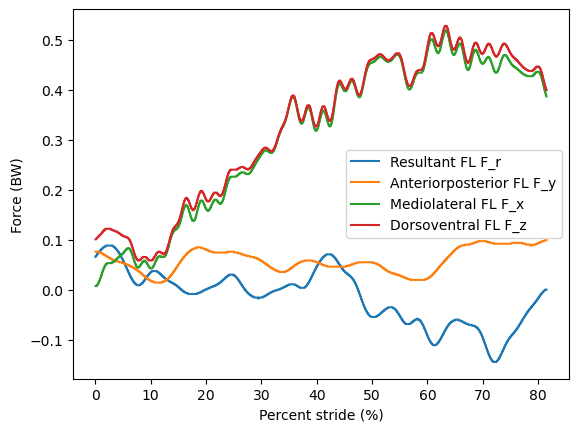

In [223]:
print(p_force_flonly.shape, fl_Fx_bw.shape, fl_Fy_bw.shape, fl_Fz_bw.shape, fl_Fr_bw.shape )
if FL == 1:
    plt.figure(4)
    plt.plot(p_force_flonly, fl_Fx_bw)
    
    plt.plot(p_force_flonly, fl_Fy_bw)
  
    plt.plot(p_force_flonly, fl_Fz_bw)
   
    plt.plot(p_force_flonly, fl_Fr_bw)
   
    plt.xlabel('Percent stride (%)')
    plt.ylabel('Force (BW)')
    plt.legend({'Mediolateral FL F_x', 'Anteriorposterior FL F_y', 'Dorsoventral FL F_z', 'Resultant FL F_r'});
    plt.show()

Saving graph as vector image

<Figure size 640x480 with 0 Axes>

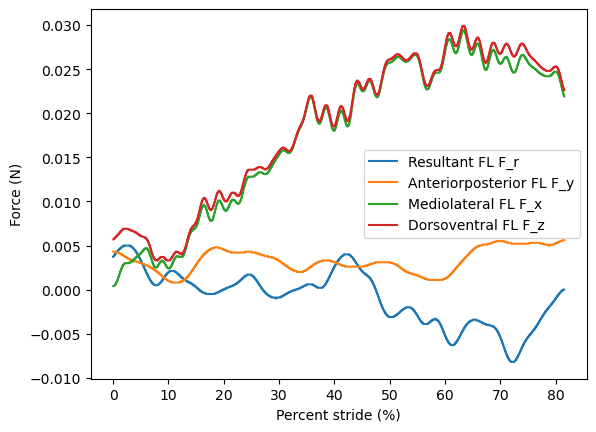

In [224]:
if FL == 1:
    FL_ground_reaction_forces = walk_seq +'_fl_forces_bw.pdf'
    plt.savefig(FL_ground_reaction_forces,format = 'pdf')

    
    plt.figure(5)
    plt.plot(p_force_flonly, f_x_flonly)
   
    plt.plot(p_force_flonly, f_y_flonly)

    plt.plot(p_force_flonly, f_z_flonly)

    plt.plot(p_force_flonly, f_r_flonly)

    plt.xlabel('Percent stride (%)')
    plt.ylabel('Force (N)')
    plt.legend({'Mediolateral FL F_x', 'Anteriorposterior FL F_y', 'Dorsoventral FL F_z', 'Resultant FL F_r'})
    plt.show()

Graphing HL ground reaction forces

In [225]:
if HL == 1:
    plt.figure(6)
    plt.plot(p_force_hlonly, hl_Fx_bw)
   
    plt.plot(p_force_hlonly, hl_Fy_bw)
   
    plt.plot(p_force_hlonly, hl_Fz_bw)
   
    plt.plot(p_force_hlonly, hl_Fr_bw)
    
    plt.xlabel('Percent stride (%)')
    plt.ylabel('Force (BW)')
    plt.legend({'Mediolateral HL F_x', 'Anteriorposterior HL F_y', 'Dorsoventral HL F_z', 'Resultant HL F_r'})
    plt.show()
    
    #saving graph as vector image
    grapgh_6 = walk_seq,'_hl_forces_bw.pdf'
    plt.savefig(grapgh_6,format = 'pdf')



Resultant Force 3D angles (alpha, beta, gamma)* calculation
% In this section, we will calculate the force theta angles (F_ax, F_by, F_yz)
% using the following <https://www.youtube.com/watch?v=HGwSCvKtDFY formula>:
%
% $\alpha_x = cos^{-1}(\frac{F_x}{F_r})$, Mediolateral angle
%
% $\beta_y = cos^{-1}(\frac{F_y}{F_r})$, Anteriorposterior angle
%
% $\gamma_z = cos^{-1}(\frac{F_z}{F_r})$, Dorsoventral angle
%
% *Calculating angles for FL*

In [226]:
#recheck this after talk with crystal, is it okey that 
if FL==1:
    fl_f_alphax = np.arccos(f_x_flonly / f_r_flonly)
    fl_f_betay = np.arccos(f_y_flonly / f_r_flonly)
    fl_f_gammaz = np.arccos(f_z_flonly / f_r_flonly)
    
    print(fl_f_alphax)
    fl_f_alphax_deg = np.degrees(fl_f_alphax)
    fl_f_betay_deg = np.degrees(fl_f_betay)
    fl_f_gammaz_deg = np.degrees(fl_f_gammaz)
    
    print(fl_f_alphax_deg)


85474    0.864366
85475    0.864366
85476    0.841069
85477    0.841069
85478    0.841069
           ...   
91110    1.570796
91111    1.570796
91112    1.570796
91113    1.570796
91114    1.570796
Length: 5641, dtype: float64
85474    49.524502
85475    49.524502
85476    48.189685
85477    48.189685
85478    48.189685
           ...    
91110    90.000000
91111    90.000000
91112    90.000000
91113    90.000000
91114    90.000000
Length: 5641, dtype: float64


Calculating angles for HL

In [227]:
#check with hl info
if HL ==1:
    hl_f_alphax = np.arccos(f_x_hlonly / f_r_hlonly)
    hl_f_betay = np.arccos(f_y_hlonly / f_r_hlonly)
    hl_f_gammaz = np.arccos(f_z_hlonly / f_r_hlonly)
    
    hl_f_alphax_deg = np.degrees(hl_f_alphax)
    hl_f_betay_deg = np.degrees(hl_f_betay)
    hl_f_gammaz_deg = np.degrees(hl_f_gammaz)


% Graphing Force Vector Angles

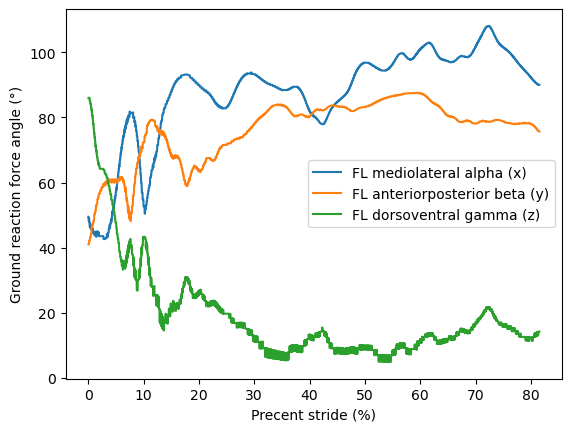

In [228]:
if FL == 1:
    plt.figure(7)
    plt.plot(p_force_flonly, fl_f_alphax_deg)
    
    plt.plot(p_force_flonly, fl_f_betay_deg)
    plt.plot(p_force_flonly, fl_f_gammaz_deg)
    
    plt.xlabel('Precent stride (%)')
    plt.ylabel('Ground reaction force angle (°)')
    plt.legend(['FL mediolateral alpha (x)', 'FL anteriorposterior beta (y)','FL dorsoventral gamma (z)'])
    plt.show()

% Graphing HL Force Vector Directions

In [229]:
#check with HL INFO
if  HL== 1:
    plt.figure(7)
    plt.plot(p_force_hlonly, hl_f_alphax_deg)
    
    plt.plot(p_force_hlonly, hl_f_betay_deg)
    plt.plot(p_force_hlonly, hl_f_gammaz_deg)
    
    plt.xlabel('Precent stride (%)')
    plt.ylabel('Ground reaction force angle (°)')
    plt.legend(['HL mediolateral alpha (x)', 'HL anteriorposterior beta (y)','HL dorsoventral gamma (z)'])
    plt.show()

Graphing Fx for FL and HL
Graphing Force for the x axis in the Fl and Hl across the stride using normalized force

In [230]:

#check with hl info
if HL == 1 and FL == 1:
    plt.figure(9)
    plt.plot(p_force_flonly,fl_Fx_bw, p_force_hlonly,hl_Fx_bw)
    plt.xlabel('Percent stride (%)')
    plt.ylabel('Ground Reaction Force (BW)')
    plt.legend('FL Mediolateral F_x', 'HL Mediolateral F_x')
    plt.legend('Location','northwest')
    plt.show()

Saving graph has a vector image

In [231]:
#GraphName9 = append(walk_seq,'_x-axis_pstride.pdf');
# saveas(gca,GraphName3)
#ax1 = gca;
#exportgraphics(ax1, GraphName9,'ContentType','vector');
# Graphing Fy for FL and HL


#check with hl info
if HL == 1 and FL == 1:
    plt.figure(10)
    plt.plot(p_force_flonly,fl_Fy_bw,p_force_hlonly,hl_Fy_bw)
    plt.xlabel('Percent stride (%)')
    plt.ylabel('Ground Reaction Force (BW)')
    plt.legend({'FL Anteriorposterioro F_y', 'HL Antereriorposterior F_y'})
    plt.show()

Save graph as vector data


In [232]:
#GraphName10 = append(walk_seq,'_y-axis_pstride.pdf');
# saveas(gca,GraphName3)
#ax1 = gca;
#exportgraphics(ax1, GraphName10,'ContentType','vector');
# Graphing Fz for FL and HL


#check with hl info
if HL == 1 and FL == 1:
    plt.figure(11)
    plt.plot(p_force_flonly,fl_Fz_bw,p_force_hlonly,hl_Fz_bw)
    plt.xlabel('Percent stride (%)')
    plt.ylabel('Ground Reaction Force (BW)')
    plt.legend({'FL Dorsoventral F_z','HL Dorsovental F_z'})
    plt.show()

Saving graph as vector image

In [233]:
#GraphName11 = append(walk_seq,'_z-axis_pstride.pdf');
# saveas(gca,GraphName3)
#ax1 = gca;
#exportgraphics(ax1, GraphName11,'ContentType','vector');
# Graphing Fr for FL and HL


#CHECK WITH HL INFO
if HL == 1 and FL == 1:
    plt.figure(12)
    plt.plot(p_force_flonly,fl_Fr_bw, p_force_hlonly,hl_Fr_bw)
    plt.xlabel('Percent stride (%)')
    plt.ylabel('Ground Reaction Force (BW)')
    plt.legend({'FL Resultant F_r', 'HL Resultant F_r'})
    plt.show()

Characterizing the Center of Pressure of the animal relative to the force plate.

Using the moment (M) values from Igor, we can calculate where the center of that force is along the force plate. The force plate measures the forces in the X, Y, and Z, as well as the associated Mx and My moments generated about the force plate's x and y axes. Used the following resource for center of pressure (COP) equations.

%FIXME need to smooth moments as well for this calculation!

Equation to find the X_cp

    X_cop = (-My / Fz), Mediolateral COP


Equation to find the Y_cp

    Y_cop = (Mx / Fz), Anterioroposterior COP Calculating the X_cp and Y_cp for FL We assume the center of pressure equates to z=0 in the video frame which is the top of the force plate

In [234]:
if FL == 1 and s1_start_force_c  > 0:
    fl_Xcp = -(m_y_flonly/f_z_flonly)
    fl_Ycp = (m_x_flonly/f_z_flonly)
    fl_Zcp = 0
print(fl_Xcp)

85474    14.000000
85475    14.000000
85476    14.000000
85477    14.000000
85478    14.000000
           ...    
91110     0.236364
91111     0.236364
91112     0.237443
91113     0.237443
91114     0.242009
Length: 5641, dtype: float64


Graphing FL Center of Pressure

/var/folders/nv/ymy6nb1d6wq1m3352zph86040000gn/T/ipykernel_58621/1349475804.py:6: UserWarning: The handle '_' has a label of '_' which cannot be automatically added to the legend.
  plt.legend('FL X_{CP}', 'FL Y_{CP}')
/var/folders/nv/ymy6nb1d6wq1m3352zph86040000gn/T/ipykernel_58621/1349475804.py:6: UserWarning: Legend does not support 'F' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('FL X_{CP}', 'FL Y_{CP}')
/var/folders/nv/ymy6nb1d6wq1m3352zph86040000gn/T/ipykernel_58621/1349475804.py:6: UserWarning: Legend does not support 'L' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('FL X_{CP}', 'FL Y_{CP}')
/var/folders/nv/ymy6nb1d6wq1m3352zph86040000gn/T/ipykernel_58621/1349475804.py:6: UserWarning: Legend does not su

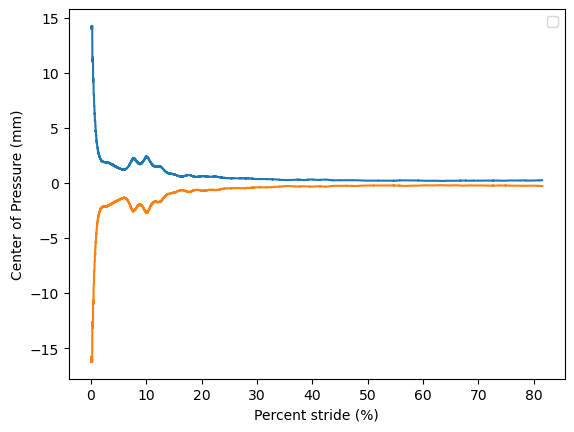

In [235]:
if FL == 1:
    plt.figure(13)
    plt.plot (p_force_flonly,fl_Xcp, p_force_flonly,fl_Ycp)
    plt.xlabel('Percent stride (%)')
    plt.ylabel('Center of Pressure (mm)')
    plt.legend('FL X_{CP}', 'FL Y_{CP}')
    plt.show()

Saves graph as vector image

In [236]:
#GraphName9 = append(walk_seq,'_fl_COP_pstride.pdf');
# saveas(gca,GraphName3)
#ax1 = gca;
#exportgraphics(ax1, GraphName9,'ContentType','image');
# Calculating the Xcp and Ycp for the HL
# Similar to the FL assummed that z_cp = 0 relative to the video frame of reference
# which corresponds to the limb in contact with the force plate.



#CHECK WITH HL INFO
if HL == 1:
    hl_Xcp = (-m_y_hlonly / f_z_hlonly)
    hl_Ycp = (m_x_hlonly / f_z_hlonly)
    hl_Zcp = 0
    
    plt.figure(14)
    plt.plot (p_force_hlonly,hl_Xcp, p_force_hlonly,hl_Ycp)
    plt.xlabel('Percent Stride (%)')
    plt.ylabel('Center of Pressure (mm)')
    plt.legend({'HL X_{CP}', 'HL Y_{CP}'})


In [237]:
#Saves graph as a vector image
#GraphName10= append(walk_seq,'_hl_COP_pstride.pdf');
# saveas(gca,GraphName3)
#ax1 = gca;
#exportgraphics(ax1, GraphName10,'ContentType',

Calculating change in COP as it moves along the limb for a stride

To know where in the video data the COP is, we first find where the force is moving along the force plate as the position over force moves along the foot/hand. This code calculates the difference between the COP vidoe postion relative to the force plate readout. Where a value of 0 corresponds to the inital position of phalange touch down: HL heel and FL is the tip of the toe

%TODO figure out what units COP is in mm? or m? Need to look at forceplate calibration document
for FL (tip of phalange)

In [238]:
#recheck this after crystal talk on time frames 
if FL == 1:
    delta_Xcp_fl = fl_Xcp - fl_Xcp.iloc[-1]
    delta_Ycp_fl = fl_Ycp - fl_Ycp.iloc[-1]
    delta_Zcp_fl = fl_Zcp - fl_Zcp
    
print(delta_Xcp_fl)

85474    13.757991
85475    13.757991
85476    13.757991
85477    13.757991
85478    13.757991
           ...    
91110    -0.005645
91111    -0.005645
91112    -0.004566
91113    -0.004566
91114     0.000000
Length: 5641, dtype: float64


for HL(heel)

In [239]:
#check with HL info
if HL == 1:
    delta_Xcp_hl = hl_Xcp-hl_Xcp.iloc[0]
    delta_Ycp_hl = hl_Ycp-hl_Ycp.iloc[0]
    delta_Zcp_hl = hl_Zcp-hl_Zcp


Graphing

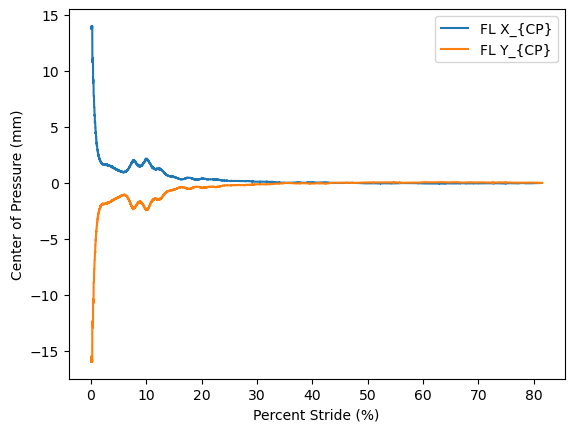

In [240]:
if FL == 1:
    plt.figure(15)
    plt.plot (p_force_flonly,delta_Xcp_fl, p_force_flonly,delta_Ycp_fl)
    plt.xlabel('Percent Stride (%)')
    plt.ylabel('Center of Pressure (mm)')
    plt.legend({'FL X_{CP}', 'FL Y_{CP}'})
    plt.show()


In [241]:
if HL == 1:
    plt.figure(16)
    plt.plot (p_force_hlonly,delta_Xcp_hl, p_force_hlonly,delta_Ycp_hl)
    plt.xlabel('Percent Stride (%)')
    plt.ylabel('Center of Pressure')
    plt.legend('HL X_{CP}', 'HL Y_{CP}')
    plt.show()

Down sampling FL and HL COP Force Data

Reducing the frequency of the force (COP) data since force and video data were sampled at different frequencies and we now need to compare the two within time.

Finding size of video data arrays

In [242]:
if FL == 1:
    fl_array = len(pt10_Z_fl_only)

print(fl_array)

hl_array = len(pt9_X_hl_only)
print(hl_array)


141
0


Resizing force data to compare/make calcualtions w/video data

In [243]:
#check again 

if FL == 1:
    new_delta_Xcp_fl = delta_Xcp_fl.iloc[1::40]
    new_delta_Ycp_fl = delta_Ycp_fl[1::40]
    
print(new_delta_Xcp_fl)

print(delta_Xcp_fl)


if HL == 1:
    new_delta_Xcp_hl = delta_Xcp_hl[1:40]
    new_delta_Ycp_hl = delta_Ycp_hl[1::40]



85475    13.757991
85515     5.980213
85555     2.810622
85595     1.906139
85635     1.657991
           ...    
90915    -0.023001
90955    -0.032993
90995    -0.023386
91035    -0.017519
91075    -0.009251
Length: 141, dtype: float64
85474    13.757991
85475    13.757991
85476    13.757991
85477    13.757991
85478    13.757991
           ...    
91110    -0.005645
91111    -0.005645
91112    -0.004566
91113    -0.004566
91114     0.000000
Length: 5641, dtype: float64


Incase the force and video data don't line up will need to delete one value for the end of the force array


In [244]:
if FL == 1:
    row_delta_fl = len(new_delta_Xcp_fl)
    row_pstride_fl = len(pstride_flonly)


if HL == 1:
    row_delta_hl = len(new_delta_Xcp_hl)
    row_pstride_hl = len(pstride_hlonly)
    
print(row_delta_fl)
print(row_pstride_fl)


if FL == 1:
    if row_delta_fl != row_pstride_fl:
        difference = row_pstride_fl - row_delta_fl
        if difference > 0: # pstride is longer than delta
            pstride_flonly=pstride_flonly[1:]
            display(difference)
        
        elif difference < 0: # if delta is longer then p stride
            new_delta_Xcp_fl=new_delta_Xcp_fl[:-1]
            new_delta_Ycp_fl=new_delta_Ycp_fl[:-1]
            
if HL == 1:
    if row_delta_hl != row_pstride_hl:
        difference = row_pstride_hl - row_delta_hl
        if difference > 0: # pstride is longer than delta
            pstride_hlonly=pstride_hlonly[1:]
            display(difference)
        
        elif difference < 0: # if delta is longer then p stride
            new_delta_Xcp_hl=[new_delta_Xcp_hl[:-1]]
            new_delta_Ycp_hl=[new_delta_Ycp_hl[:-1]]
                       


141
141


Deciding where to cut analysis for FL & HL

/var/folders/nv/ymy6nb1d6wq1m3352zph86040000gn/T/ipykernel_58621/1956034701.py:6: UserWarning: The handle '_' has a label of '_' which cannot be automatically added to the legend.
  plt.legend('FL X_{CP}', 'FL Y_{CP}')
/var/folders/nv/ymy6nb1d6wq1m3352zph86040000gn/T/ipykernel_58621/1956034701.py:6: UserWarning: Legend does not support 'F' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('FL X_{CP}', 'FL Y_{CP}')
/var/folders/nv/ymy6nb1d6wq1m3352zph86040000gn/T/ipykernel_58621/1956034701.py:6: UserWarning: Legend does not support 'L' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('FL X_{CP}', 'FL Y_{CP}')
/var/folders/nv/ymy6nb1d6wq1m3352zph86040000gn/T/ipykernel_58621/1956034701.py:6: UserWarning: Legend does not su

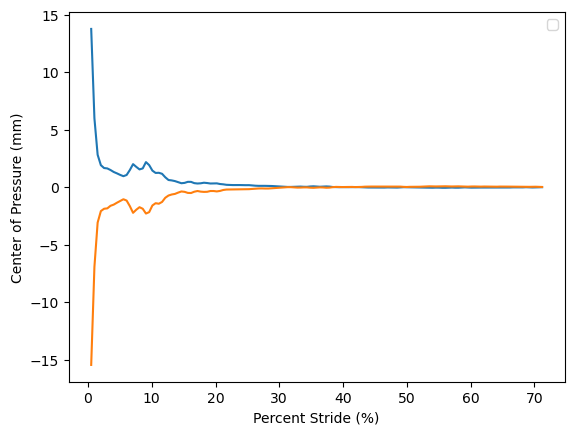

In [245]:
if FL == 1:
    plt.figure(17)
    plt.plot (pstride_flonly,new_delta_Xcp_fl, pstride_flonly,new_delta_Ycp_fl)
    plt.xlabel('Percent Stride (%)')
    plt.ylabel('Center of Pressure (mm)')
    plt.legend('FL X_{CP}', 'FL Y_{CP}')
    plt.show()

if HL == 1:
    plt.figure(18)
    plt.plot (pstride_hlonly,new_delta_Xcp_hl, pstride_hlonly,new_delta_Ycp_hl)
    plt.xlabel('Percent Stride (%)')
    plt.ylabel('Center of Pressure (mm)')
    plt.legend('HL X_{CP}', 'HL Y_{CP}')



In [246]:
#this is good 
round_pstride_fl = np.round(pstride_flonly, 1)
print(round_pstride_fl)
cut_FL = np.where(round_pstride_fl==31)
print(cut_FL)

if HL == 1:
    round_pstride_hl = np.round(pstride_hlonly, 1)
    cut_HL = np.where(round_pstride_hl==155.6)


[ 0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.1  5.6  6.1  6.6  7.1
  7.6  8.1  8.6  9.1  9.6 10.1 10.6 11.1 11.6 12.1 12.6 13.1 13.6 14.1
 14.6 15.2 15.7 16.2 16.7 17.2 17.7 18.2 18.7 19.2 19.7 20.2 20.7 21.2
 21.7 22.2 22.7 23.2 23.7 24.2 24.7 25.3 25.8 26.3 26.8 27.3 27.8 28.3
 28.8 29.3 29.8 30.3 30.8 31.3 31.8 32.3 32.8 33.3 33.8 34.3 34.8 35.4
 35.9 36.4 36.9 37.4 37.9 38.4 38.9 39.4 39.9 40.4 40.9 41.4 41.9 42.4
 42.9 43.4 43.9 44.4 44.9 45.5 46.  46.5 47.  47.5 48.  48.5 49.  49.5
 50.  50.5 51.  51.5 52.  52.5 53.  53.5 54.  54.5 55.1 55.6 56.1 56.6
 57.1 57.6 58.1 58.6 59.1 59.6 60.1 60.6 61.1 61.6 62.1 62.6 63.1 63.6
 64.1 64.6 65.2 65.7 66.2 66.7 67.2 67.7 68.2 68.7 69.2 69.7 70.2 70.7
 71.2]
(array([], dtype=int64),)


Down Sampling Force Data
Resizing force data to compare/make calcualtions joint position data (video data)

In [259]:
#recheck
new_f_x_flonly = f_x_flonly[1::40]
print(new_f_x_flonly.shape)
new_f_y_flonly = f_y_flonly[1::40]
print("new_f_y_flonly", new_f_y_flonly.shape)
new_f_z_flonly = f_z_flonly[1::40]
new_f_r_flonly = f_r_flonly[1::40]

if HL == 1:
    new_f_x_hlonly = f_x_hlonly[1::40]
    new_f_y_hlonly = f_y_hlonly[1::40]
    new_f_z_hlonly = f_z_hlonly[1::40]
    new_f_r_hlonly = f_r_hlonly[1::40]


(141,)
new_f_y_flonly (141,)


Incase the force and video data don't line up will need to delete one value from the end of the force array

In [260]:
row_forcedelta_fl = len(new_f_x_flonly)
row_pstride_fl = len(pstride_flonly)
print(row_forcedelta_fl)
print(row_pstride_fl)

if HL == 1:
    row_forcedelta_hl = len(new_f_x_hlonly)
    row_pstride_hl = len(pstride_hlonly)
    
if row_forcedelta_fl != row_pstride_fl:
    difference_forcefl = row_pstride_fl - f_x_hlonly
    if difference_forcefl < 0: # if delta is longer then p stride
        new_f_x_flonly=new_f_x_flonly[:-1]
        new_f_y_flonly=new_f_y_flonly[:-1]
        new_f_z_flonly=new_f_z_flonly[:-1]
        new_f_r_flonly=new_f_r_flonly[:-1]
        
print(new_f_x_flonly)

if HL == 1:
    if row_forcedelta_hl != row_pstride_hl:
        difference_forcehl = row_pstride_hl - row_forcedelta_hl
        if difference_forcehl < 0: # if delta is longer then p stride
            new_f_x_hlonly=new_f_x_hlonly[:-1]
            new_f_y_hlonly=new_f_y_hlonly[:-1]
            new_f_z_hlonly=new_f_z_hlonly[:-1]
            new_f_r_hlonly=new_f_r_hlonly[:-1]


141
141
85475    0.0037
85515    0.0043
85555    0.0046
85595    0.0049
85635    0.0050
          ...  
90915   -0.0021
90955   -0.0016
90995   -0.0012
91035   -0.0007
91075   -0.0002
Name: Fx_SS, Length: 141, dtype: float64


XYZ Points of COP relative to video coordinates


This section creates a new variable that takes the COP estimate from the video for the HL (pt8-ankle) and adds the force COP to correlate with the shift in force production along the limb (within the reference frame of the video). Adds the difference from the beginning of HL contact .

Likewise for the FL, we use pt 10 (phalange) and add the difference from the end of FL contact.

This finds the xyz postion of the COP relative to the video coordinates, where a value of zero in the HL corresponds to the heel, and a value of zero in the FL corresponds to the tip of the phalanage.

In [261]:


if FL == 1:
    pt10_Xcop_flonly = pt10_X_fl_only.iloc[-1] - new_delta_Ycp_fl
    pt10_Ycop_flonly = pt10_Y_fl_only.iloc[-1] + new_delta_Xcp_fl
    pt10_Zcop_flonly = 0
print(pt10_Xcop_flonly)

if HL == 1:
    pt9_Xcop_hlonly = pt9_X_hl_only[0] - new_delta_Ycp_hl
    pt9_Ycop_hlonly = pt9_Y_hl_only[0] + new_delta_Xcp_hl
    pt9_Zcop_hlonly = 0


85475    23.414211
85515    14.886433
85555    11.032632
85595    10.034581
85635     9.830878
           ...    
90915     7.924542
90955     7.918309
90995     7.915223
91035     7.921354
91075     7.935763
Length: 141, dtype: float64


Graphing new COP video XYZ points

/var/folders/nv/ymy6nb1d6wq1m3352zph86040000gn/T/ipykernel_58621/1787548357.py:6: UserWarning: The handle '_' has a label of '_' which cannot be automatically added to the legend.
  plt.legend('FL X_CP', 'FL Y_CP')
/var/folders/nv/ymy6nb1d6wq1m3352zph86040000gn/T/ipykernel_58621/1787548357.py:6: UserWarning: Legend does not support 'F' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('FL X_CP', 'FL Y_CP')
/var/folders/nv/ymy6nb1d6wq1m3352zph86040000gn/T/ipykernel_58621/1787548357.py:6: UserWarning: Legend does not support 'L' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('FL X_CP', 'FL Y_CP')
/var/folders/nv/ymy6nb1d6wq1m3352zph86040000gn/T/ipykernel_58621/1787548357.py:6: UserWarning: Legend does not support ' ' in

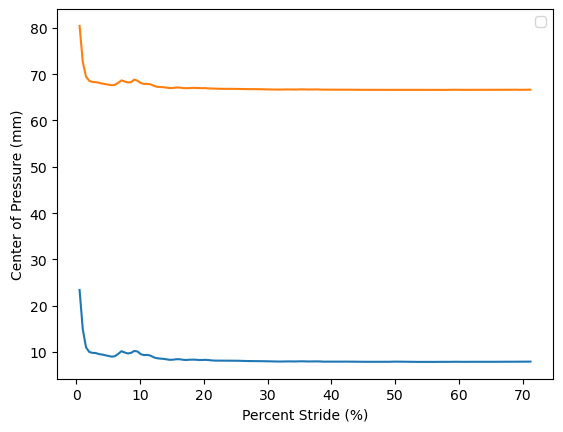

In [262]:
if FL == 1:
    plt.figure(19)
    plt.plot(pstride_flonly, pt10_Xcop_flonly, pstride_flonly, pt10_Ycop_flonly)
    plt.xlabel('Percent Stride (%)')
    plt.ylabel('Center of Pressure (mm)')
    plt.legend('FL X_CP', 'FL Y_CP')
    plt.show()

if HL == 1:
    plt.figure(20)
    plt.plot(pstride_hlonly, pt9_Xcop_hlonly, pstride_hlonly, pt9_Ycop_hlonly)
    plt.xlabel('Percent Stride (%)')
    plt.ylabel('Center of Pressure (mm)')
    plt.legend('HL X_{CP}', 'HL Y_{CP}')
    plt.show()

Making the COP the Origin for Force Vector Analysis
This is to ensure than the force vector always originates at the origin relative to the joint angles.
FL: shoulder pt 3, elbow pt 4, and wrist pt 5

In [263]:
#reheck this 
if FL == 1:
    print("pt4_X_fl_only:", pt4_X_fl_only.shape)
    print("pt10_Xcop_flonly:", pt10_Xcop_flonly.shape)
    
    print("Index of pt4_X_fl_only:", pt4_X_fl_only.index)
    print("Index of pt10_Xcop_fl", pt10_Xcop_flonly.index)
    
    pt4_X_fl_only = pt4_X_fl_only.reset_index(drop=True)
    pt10_Xcop_flonly_series = pt10_Xcop_flonly.reset_index(drop=True) #i might want to do these change in index from the formation of pt10_Xcop_flonly, 
    print("pt10_Xcop_flonly_aligned", pt10_Xcop_flonly_series.shape)
    #normalizing new points for shoulder (pt4)
    norm_pt4_x = pt4_X_fl_only - pt10_Xcop_flonly_series
    
    pt4_Y_fl_only = pt4_Y_fl_only.reset_index(drop=True)

    pt10_Ycop_flonly_series = pt10_Ycop_flonly.reset_index(drop=True) #i might want to do these change in index from the formation of pt10_Xcop_flonly, 
    norm_pt4_y = pt4_Y_fl_only - pt10_Ycop_flonly_series
    norm_pt4_z = pt4_Z_fl_only - pt10_Zcop_flonly
    
    #print( "norm_pt4_x",norm_pt4_x) these are similar to matlab but not quite the same 
    #print("norm_pt4_y", norm_pt4_y)
    #print("norm_pt4_z", norm_pt4_z) #these are the same as matlab
    
    
     #normalizing new points  for elbow (pt2)
    pt2_X_fl_only = pt2_X_fl_only.reset_index(drop=True)
    norm_pt2_x = pt2_X_fl_only - pt10_Xcop_flonly_series
    #print("norm_pt2_x",norm_pt2_x)
    
    pt2_Y_fl_only = pt2_Y_fl_only.reset_index(drop=True)
    norm_pt2_y = pt2_Y_fl_only - pt10_Ycop_flonly_series
    #print("norm_pt2_y", norm_pt2_y)
    
    norm_pt2_z = pt2_Z_fl_only - pt10_Zcop_flonly
    #print("norm_pt2_z",norm_pt2_z)
    
    #normalizing new points  for wrist (pt3)
    pt3_X_fl_only = pt3_X_fl_only.reset_index(drop=True)
    norm_pt3_x = pt3_X_fl_only - pt10_Xcop_flonly_series
    print("norm_pt3_x", norm_pt3_x)
    
    pt3_Y_fl_only = pt3_Y_fl_only.reset_index(drop=True)
    norm_pt3_y = pt3_Y_fl_only - pt10_Ycop_flonly_series
    print("norm_pt3_y", norm_pt3_y)
    norm_pt3_z = pt3_Z_fl_only - pt10_Zcop_flonly
    
      
   
    

pt4_X_fl_only: (141,)
pt10_Xcop_flonly: (141,)
Index of pt4_X_fl_only: RangeIndex(start=0, stop=141, step=1)
Index of pt10_Xcop_fl RangeIndex(start=85475, stop=91115, step=40)
pt10_Xcop_flonly_aligned (141,)
norm_pt3_x 0     -21.307458
1     -12.651124
2      -8.381884
3      -7.139885
4      -6.921838
         ...    
136    -4.289206
137    -4.248218
138    -4.209421
139    -4.182136
140    -4.163396
Length: 141, dtype: float64
norm_pt3_y 0     -14.749122
1      -6.410868
2      -3.105356
3      -1.974978
4      -1.627244
         ...    
136     1.376316
137     1.396458
138     1.387251
139     1.387074
140     1.386381
Length: 141, dtype: float64


HL: Hip pt 7, knee pt 8, ankle pt 9

In [253]:
if HL == 1:
    #normalizing new points  for hip (pt7)
    norm_pt7_x = pt7_X_hl_only - pt9_Xcop_hlonly
    norm_pt7_y = pt7_Y_hl_only - pt9_Ycop_hlonly
    norm_pt7_z = pt7_Z_hl_only - pt9_Zcop_hlonly
    
    #normalizing new points  for knee (pt5)
    norm_pt5_x = pt5_X_hl_only - pt9_Xcop_hlonly
    norm_pt5_y = pt5_Y_hl_only - pt9_Ycop_hlonly
    norm_pt5_z = pt5_Z_hl_only - pt9_Zcop_hlonly
    
    #normalizing new points  for ankle (pt6)
    norm_pt6_x = pt6_X_hl_only - pt9_Xcop_hlonly
    norm_pt6_y = pt6_Y_hl_only - pt9_Ycop_hlonly
    norm_pt6_z = pt6_Z_hl_only - pt9_Zcop_hlonly


Setting up joint and force vectors

Flipping GRF force x and y becuase the reference frames are flipped in the video vs. the force plate. As a result need to get the inverse for force x by mulitplying by -1.

In [264]:
if FL == 1:
    new_f_x_flonly_flip = new_f_x_flonly * -1
print("new_f_x_flonly_flip",new_f_x_flonly_flip)

if HL == 1:
    new_f_x_hlonly_flip = new_f_x_hlonly * -1


new_f_x_flonly_flip 85475   -0.0037
85515   -0.0043
85555   -0.0046
85595   -0.0049
85635   -0.0050
          ...  
90915    0.0021
90955    0.0016
90995    0.0012
91035    0.0007
91075    0.0002
Name: Fx_SS, Length: 141, dtype: float64


Creating matrices for joint moment arm calculations

In [276]:
#rechecks this 

if FL == 1:
    #only new_f_x_flonly_flip and new_f_z_flonly are the same in matlab
    new_f_y_flonly_reset = new_f_y_flonly.reset_index(drop=True)
    new_f_x_flonly_flip_reset = new_f_x_flonly_flip.reset_index(drop=True)
    new_f_z_flonly_reset = new_f_z_flonly.reset_index(drop=True)

    GRF_fl = pd.concat([new_f_y_flonly_reset, new_f_x_flonly_flip_reset, new_f_z_flonly_reset], axis=1)
    
    
   
print(GRF_fl.shape)

if HL == 1:
    GRF_hl = [new_f_y_hlonly, new_f_x_hlonly_flip, new_f_z_hlonly]


if FL == 1:
    
    p3 = np.column_stack([norm_pt3_x.values, norm_pt3_y.values, norm_pt3_z.values])
    p4 = np.column_stack([norm_pt4_x.values, norm_pt4_y.values, norm_pt4_z.values])
    p2 = np.column_stack([norm_pt2_x.values, norm_pt2_y.values, norm_pt2_z.values])
    #%p6 = [norm_pt6_x, norm_pt6_y, norm_pt6_z] % for kassina
print("p3 shape ",p3.shape, "norm_pt3_x", norm_pt3_x.shape)

if HL == 1:
    p7 = np.column_stack([norm_pt7_x.values, norm_pt7_y.values, norm_pt7_z.values])
    p5 = np.column_stack([norm_pt5_x.values, norm_pt5_y.values, norm_pt5_z.values])
    p6 = np.column_stack([norm_pt6_x.values, norm_pt6_y.values, norm_pt6_z.values])

print(len(new_f_y_flonly))
print(len(new_f_x_flonly_flip))
print(len(new_f_z_flonly))
if FL == 1:
    GRF_fl_40 = [new_f_y_flonly.iloc[39], new_f_x_flonly_flip.iloc[39], new_f_z_flonly.iloc[39]]
print(GRF_fl_40)

if HL == 1:
    GRF_hl_40 = [new_f_y_hlonly.iloc[39], new_f_x_hlonly_flip.iloc[39], new_f_z_hlonly.iloc[39]]


if FL == 1:
    p3_40 = [norm_pt3_x.iloc[39], norm_pt3_y.iloc[39], norm_pt3_z.iloc[39]]
    p4_40 = [norm_pt4_x.iloc[39], norm_pt4_y.iloc[39], norm_pt4_z.iloc[39]]
    p2_40 = [norm_pt2_x.iloc[39], norm_pt2_y.iloc[39], norm_pt2_z.iloc[39]]
    #%p6_40 = [norm_pt6_x.iloc[39], norm_pt6_y.iloc[39], norm_pt6_z.iloc[39]] # for kassina
print(p3_40)

if HL == 1:
    p7_40 = [norm_pt7_x.iloc[39], norm_pt7_y.iloc[39], norm_pt7_z.iloc[39]]
    p5_40 = [norm_pt5_x.iloc[39], norm_pt5_y.iloc[39], norm_pt5_z.iloc[39]]
    p6_40 = [norm_pt6_x.iloc[39], norm_pt6_y.iloc[39], norm_pt6_z.iloc[39]]


(141, 3)
p3 shape  (141, 3) norm_pt3_x (141,)
141
141
141
[0.0042, -0.0008, 0.0097]
[-4.67471579160194, 0.8966098231417448, 79.834921]


Analysing Joint Moments and Torques
This code will:
Create new set points for the FL that are normalized to be in a same sized array and will only contain the data values from when only the FL is in contact with the force plate
Creating new set points for HL that are normalized to be in a same sized array and will only contain the data values from when only the HL is in contact with the force plate
Use the new set points to calculate for the moment arm () in order to calulate for the joint toque
Calulate resultatnt force, , using the data values from the force plate data sets
Once () is obtained, use the results to calculate for joint torque using the equation:  
Equations were based upon the following resource
Calculating moment arm/radius ultimately for torque calculations
Calculating the moment arm length based upon the 3D position of the joint angle (e.g. pt. 6) and the force vector which begins and the COP origin.

    |a_2| = √|a|^2 - |(a * b/|b|) * b/|b| | ^3
Where a, is the joint center point
And b, is the force vector.
*, denotes the crossproduct
Alternatively it can also be calculated as:

    d = |⇀x0 x (⇀x0 - ⇀x2)| / |⇀x2|
Where,
X0= Joint position coordinates
X2= GRF
x, denotes the cross product
Identifying joint radii (*$r$) for the FL relative to force normal*
 = shoulder point(pt3)
 = elbow point(pt4)
 = wrist point(pt5)

In [289]:
if FL == 1:
    GRF_carrot_fl = GRF_fl / np.linalg.norm(GRF_fl, axis=1)[:, np.newaxis]
    s_1 = np.array(np.sum(p4 * GRF_carrot_fl, axis=1))[:, np.newaxis] * GRF_carrot_fl

    print(s_1)
    r_s = np.sqrt(np.linalg.norm(p4, axis=1)**2 - np.linalg.norm(s_1, axis=1)**2)
    
    
    e_1 = np.array(np.sum(p2 * GRF_carrot_fl, axis=1,)) [:, np.newaxis]* GRF_carrot_fl
    r_e = np.sqrt(np.linalg.norm(p2, ord=2, axis=1) ** 2 - np.linalg.norm(e_1, ord=2, axis=1) ** 2)
    
    w_1 = np.array(np.sum(p3 * GRF_carrot_fl, axis=1)) [:, np.newaxis] * GRF_carrot_fl
    r_w = np.sqrt(np.linalg.norm(p3, ord=2, axis=1) ** 2 - np.linalg.norm(w_1, ord=2, axis=1) ** 2)

         Fy_SS      Fx_SS      Fz_SS
0    -4.164057   3.583026  -0.387354
1     2.937102  -3.007033   0.629379
2    10.377315 -11.642841   4.808999
3    14.228745 -17.877141   9.850670
4    15.151927 -20.475578  12.285347
..         ...        ...        ...
136  14.200714   5.964300  68.731456
137  14.450967   4.533637  69.137959
138  14.613021   3.372236  69.411850
139  15.308661   1.984456  69.455961
140  16.415281   0.596919  69.242639

[141 rows x 3 columns]


Graphing FL Joint Moments

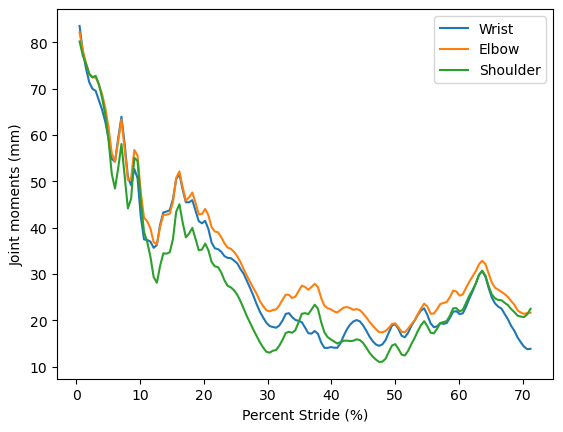

In [290]:
if FL == 1:
    plt.figure(21)
    plt.plot(pstride_flonly, r_s, pstride_flonly, r_e, pstride_flonly, r_w)
    plt.xlabel('Percent Stride (%)')
    plt.ylabel('Joint moments (mm)')
    plt.legend({'Shoulder', 'Elbow', 'Wrist'})
    plt.show()

Identifying joint radii (*$r$) for the HL relative to force normal*
 rh= hip point(pt6)
 rk= elbow point(pt7)
 ra= ankle point(pt8)

In [291]:
if HL == 1:
    GRF_carrot_hl = GRF_hl / np.linalg.norm(GRF_hl, axis=1)[:, np.newaxis]
    h_1 = np.array(np.sum(p7 * GRF_carrot_hl, axis=1))[:, np.newaxis] * GRF_carrot_hl

    print(s_1)
    r_h = np.sqrt(np.linalg.norm(p7, axis=1)**2 - np.linalg.norm(h_1, axis=1)**2)
    
    
    k_1 = np.array(np.sum(p5 * GRF_carrot_hl, axis=1,)) [:, np.newaxis]* GRF_carrot_hl
    r_k = np.sqrt(np.linalg.norm(p5, ord=2, axis=1) ** 2 - np.linalg.norm(k_1, ord=2, axis=1) ** 2)
    
    a_1 = np.array(np.sum(p6 * GRF_carrot_hl, axis=1)) [:, np.newaxis] * GRF_carrot_hl
    r_a = np.sqrt(np.linalg.norm(p6, ord=2, axis=1) ** 2 - np.linalg.norm(a_1, ord=2, axis=1) ** 2)

Graphing HL Joint Moments

In [292]:
if HL == 1:
    plt.figure(22)
    plt.plot(pstride_hlonly, r_h, pstride_hlonly, r_k, pstride_hlonly, r_a)
    plt.xlabel('Percent Stride (%)')
    plt.ylabel('Joint moments (mm)')
    plt.legend({'Hip', 'Knee', 'Ankle'})


Calculating Torque

Where,
 t= torque
 r= moment arms
 Fr= force int results
 
Forelimb Torques

In [293]:
if FL == 1:
    torque_s = r_s * new_f_r_flonly
    torque_e = r_e * new_f_r_flonly
    torque_w = r_w * new_f_r_flonly

Graphing Torques

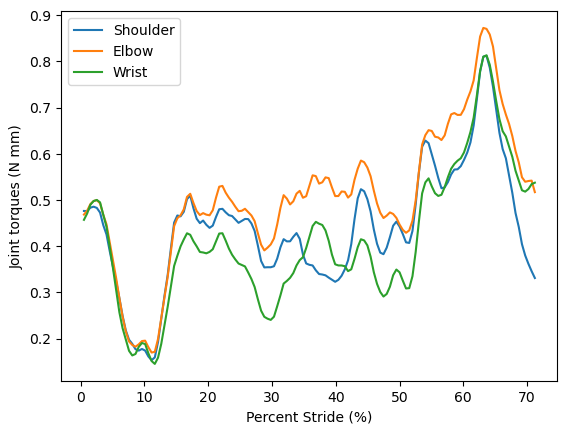

In [296]:
if FL == 1:
    plt.figure(23)
    plt.plot(pstride_flonly, torque_s, pstride_flonly, torque_e, pstride_flonly, torque_w)
    plt.xlabel('Percent Stride (%)')
    plt.ylabel('Joint torques (N mm)')
    plt.legend(['Shoulder', 'Elbow', 'Wrist'])
    plt.show()

Hindlimb Torques

In [297]:
if HL == 1:
    torque_h = r_h * new_f_r_hlonly
    torque_k = r_k * new_f_r_hlonly
    torque_a = r_a * new_f_r_hlonly


Graphing HL Torques

In [298]:
if HL == 1:
    plt.figure(24)
    plt.plot(pstride_hlonly, torque_h, pstride_hlonly, torque_k, pstride_hlonly, torque_a)
    plt.xlabel('Percent Stride (%)')
    plt.ylabel('Joint torques (N mm)')
    plt.legend(['Hip', 'Knee', 'Ankle'])
    plt.show()

*Displaying force direction in quiver plot for the FL (lateral view z-x)*
% Note: new_f_y_flonly is x in video

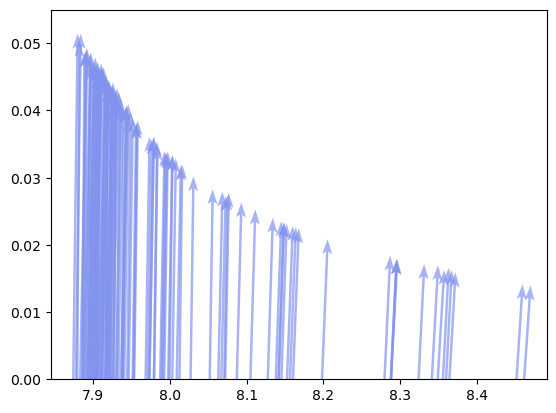

In [339]:
if FL ==1:
    if film_side_right == 0:
        pstride_fl_quiv = pstride_flonly[29:]  # equivalent to pstride_flonly(30:end)
        x_quiv_fl = -pt10_Xcop_flonly[29:]  # equivalent to -pt10_Xcop_flonly(30:end)
        quiv_fl_size = len(x_quiv_fl)
        y_array_fl = np.zeros(quiv_fl_size)
        u_quiv_fl_lat = -new_f_y_flonly[29:] / bod_weight_N
        v_quiv_fl_lat = new_f_z_flonly[29:] / bod_weight_N
    else:
        pstride_fl_quiv = pstride_flonly[29:]  # equivalent to pstride_flonly(30:end)
        x_quiv_fl = pt10_Xcop_flonly[29:]  # equivalent to pt10_Xcop_flonly(30:end)
        quiv_fl_size = len(x_quiv_fl)
        y_array_fl = np.zeros(quiv_fl_size)
        u_quiv_fl_lat = new_f_y_flonly[29:] / bod_weight_N
        v_quiv_fl_lat = new_f_z_flonly[29:] / bod_weight_N

    plt.figure(25)
    plt.quiver(x_quiv_fl, y_array_fl, u_quiv_fl_lat, v_quiv_fl_lat, scale_units='xy', angles='xy', scale=10, color = '#8293ee', alpha=0.7, linewidth=1.5, width=0.005, headwidth=4, headlength=6, headaxislength=5)  #ensures the sacles is same for both x and y and angles are also based on the x and y vals, adjusted for prettier colors :)
    plt.ylim(0.00, None)
    plt.show()

% *Displaying force direction in quiver plot for the FL (dorsal view y-x)*
% Note: new_f_y_flonly is x in video

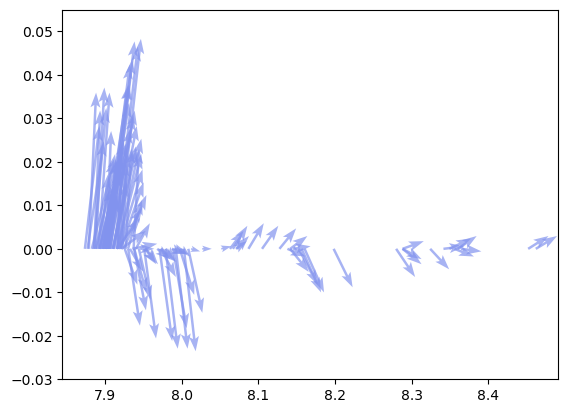

In [345]:
if FL == 1:
    if film_side_right == 0:
        u_quiv_fl_dor = -new_f_y_flonly[29:]/bod_weight_N; # horizontal axis # (cut_FL:end)
        v_quiv_fl_dor = -new_f_x_flonly_flip[29:]/bod_weight_N; # vertical axis
    else:
        u_quiv_fl_dor = new_f_y_flonly[29:]/bod_weight_N; # horizontal axis # (cut_FL:end)
        v_quiv_fl_dor = new_f_x_flonly_flip[29:]/bod_weight_N; # vertical axis
    
    plt.figure(26)
    plt.quiver(x_quiv_fl, y_array_fl, u_quiv_fl_dor, v_quiv_fl_dor, scale_units='xy', angles='xy', scale=3, color = '#8293ee', alpha=0.7, linewidth=1.5, width=0.005, headwidth=4, headlength=6, headaxislength=5)  #ensures the sacles is same for both x and y and angles are also based on the x and y vals, adjusted for prettier colors :)
    plt.ylim(-0.03)
    plt.show()

% *Displaying force direction in quiver plot for the HL (lateral view z-x)*


In [347]:
if HL == 1:
    if film_side_right == 0:
        pstride_hl_quiv = pstride_hlonly[1:cut_HL]
        
        x_quiv_hl = -pt9_Xcop_hlonly[1:cut_HL]
        quiv_hl_size = np.size(x_quiv_hl)
        y_array_hl = np.zeros([quiv_hl_size, 1]) # zero
        
        u_quiv_hl_lat = -new_f_y_hlonly[1:cut_HL]/bod_weight_N # horizontal axis
        v_quiv_hl_lat = new_f_z_hlonly[1:cut_HL]/bod_weight_N # vertical axis
    else:
        pstride_hl_quiv = pstride_hlonly[1:cut_HL]
        
        x_quiv_hl = pt9_Xcop_hlonly[1:cut_HL]
        quiv_hl_size = np.size(x_quiv_hl)
        y_array_hl = np.zeros([quiv_hl_size, 1]) # zero
        
        u_quiv_hl_lat = new_f_y_hlonly[1:cut_HL]/bod_weight_N # horizontal axis
        v_quiv_hl_lat = new_f_z_hlonly[1:cut_HL]/bod_weight_N # vertical axis
    
    
    plt.figure(27)
    plt.quiver(x_quiv_hl, y_array_hl, u_quiv_hl_lat, v_quiv_hl_lat)

% *Displaying force direction in quiver plot for the HL (dorsal view y-x)*
% Note: new_f_y_flonly is x in video

In [348]:
if HL == 1:
    if film_side_right == 0:
        u_quiv_hl_dor = -new_f_y_hlonly[1:cut_HL]/bod_weight_N # horizontal axis # [1:cut_HL]
        v_quiv_hl_dor = -new_f_x_hlonly[1:cut_HL]/bod_weight_N # vertical axis
    else:
        u_quiv_hl_dor = new_f_y_hlonly[1:cut_HL]/bod_weight_N # horizontal axis # [1:cut_HL]
        v_quiv_hl_dor = new_f_x_hlonly[1:cut_HL]/bod_weight_N # vertical axis
    
    
    plt.figure(28)
    plt.quiver(x_quiv_hl, y_array_hl, u_quiv_hl_dor, v_quiv_hl_dor)


Forces Display for FL in Compass

Fl

HL

In [382]:

if HL==1:
    hl_Fx_nth = hl_Fx_bw[1::200]
    hl_f0x_nth = hl_f_alphax[1::200]
    plt.figure(32)
    plt.quiver(np.zeros_like(hl_f0x_nth), np.zeros_like(hl_f0x_nth), hl_f0x_nth, hl_Fx_nth, angles='xy', scale_units='xy', scale=30, color = '#8293ee', alpha=0.7, linewidth=1.5, width=0.005, headwidth=4, headlength=6, headaxislength=5)  
    plt.title('hl_F_x')
    
    hl_Fy_nth = hl_Fy_bw[1::200]
    hl_f0y_nth = hl_f_betay[1::200]
    plt.figure(33)
    plt.quiver(hl_f0y_nth,hl_Fy_nth )
    plt.title('hl_F_y')
    
    hl_Fz_nth = hl_Fz_bw[1::200]
    hl_f0z_nth = hl_f_gammaz[1::200]
    plt.figure(34)
    plt.quiver(hl_f0z_nth,hl_Fz_nth )
    plt.title('hl_F_z')


Diplay of scaled and normalized data in feather()
Fl

Forces Display for FL in Polar Plots with normalized data
Fl

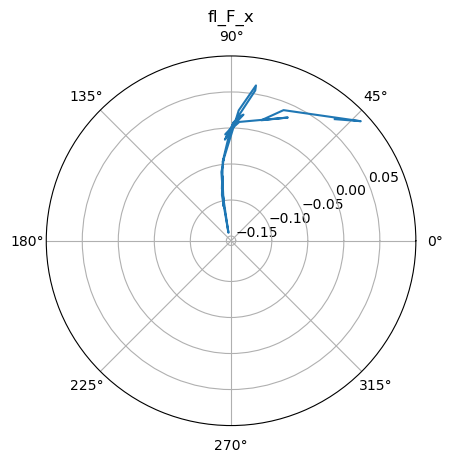

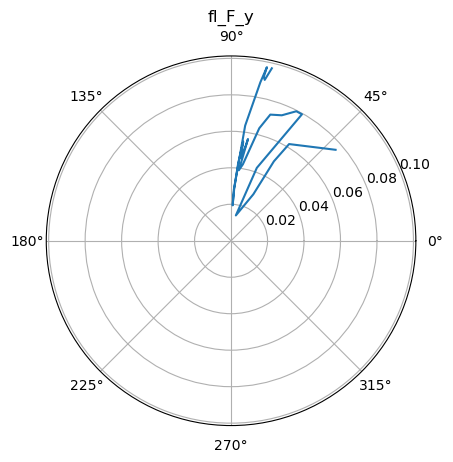

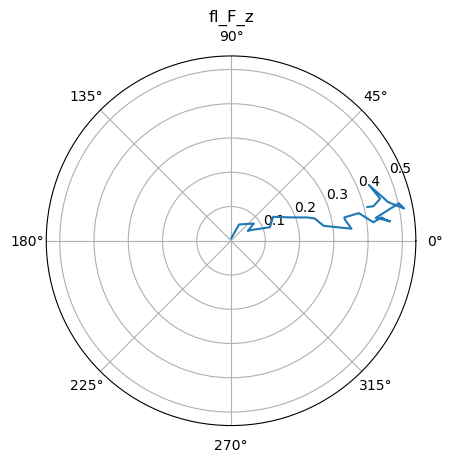

In [385]:
if FL ==1:
    
    plt.figure(35)
    plt.polar(fl_f0x_nth,fl_Fx_nth)
    plt.title('fl_F_x')
    
    plt.figure(36)
    plt.polar(fl_f0y_nth,fl_Fy_nth)
    plt.title('fl_F_y')
    
    plt.figure(37)
    plt.polar(fl_f0z_nth,fl_Fz_nth)
    plt.title('fl_F_z')

plt.show()

HL

In [386]:
if HL ==1:
    
    plt.figure(38)
    plt.polar(hl_f0x_nth,hl_Fx_nth)
    plt.title('hl_F_x')
    
    plt.figure(39)
    plt.polar(hl_f0y_nth,hl_Fy_nth)
    plt.title('hl_F_y')
    
    plt.figure(40)
    plt.polar(hl_f0z_nth,hl_Fz_nth)
    plt.title('hl_F_z')

plt.show()

/Users/jenifer_dubon/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


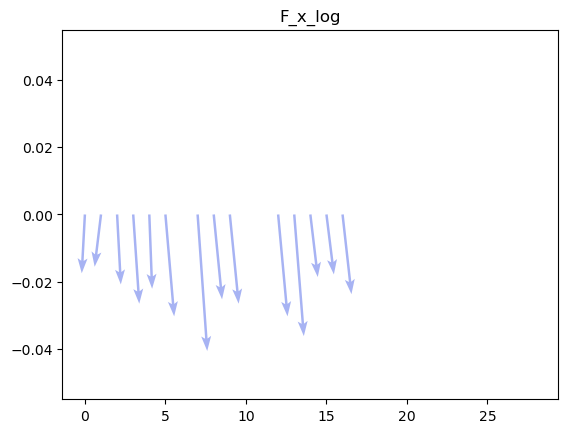

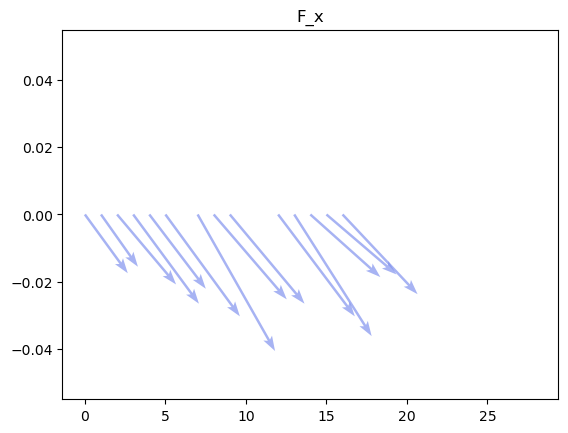

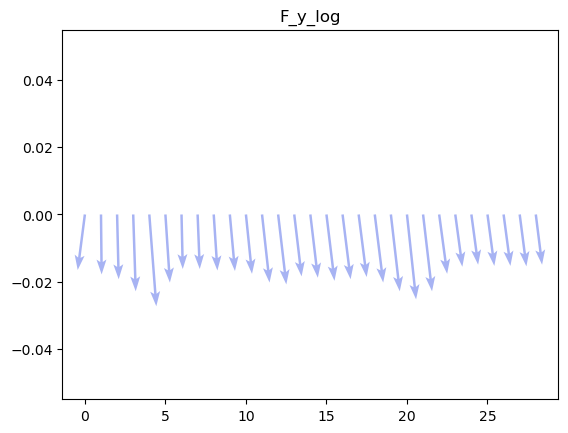

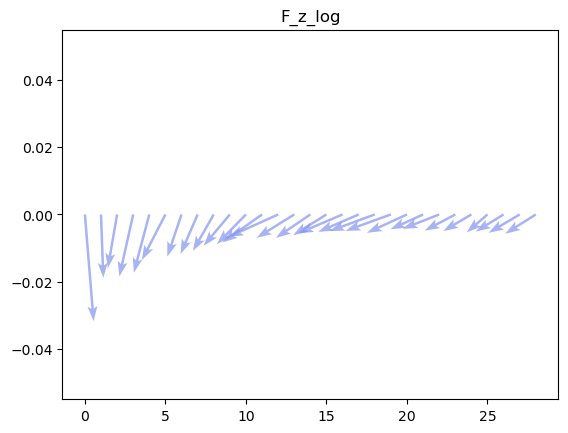

In [405]:
if FL==1:
    fl_Fx_log = np.log10(fl_Fx_nth)
    fl_Fx_deg_log = np.log10(fl_f0x_nth)
    # for f_x
    plt.figure(41)
    plt.quiver(fl_Fx_deg_log, fl_Fx_log,  scale=10, color = '#8293ee', alpha=0.7, linewidth=1.5, width=0.005, headwidth=4, headlength=6, headaxislength=5)
    plt.title('F_x_log')
    

    plt.figure(42)
    plt.quiver(fl_f0x_nth, fl_Fx_log, scale=10, color = '#8293ee', alpha=0.7, linewidth=1.5, width=0.005, headwidth=4, headlength=6, headaxislength=5)
    plt.title('F_x')

    # for fy
    fl_Fy_log = np.log10(fl_Fy_nth)
    fl_Fy_deg_log = np.log10(fl_f0y_nth)
    plt.figure(43)
    plt.quiver(fl_Fy_deg_log, fl_Fy_log,  scale=10, color = '#8293ee', alpha=0.7, linewidth=1.5, width=0.005, headwidth=4, headlength=6, headaxislength=5)
    plt.title('F_y_log')

    # for fz
    fl_Fz_log = np.log10(fl_Fz_nth)
    fl_Fz_deg_log = np.log10(fl_f0z_nth)
    plt.figure(44)
    plt.quiver(fl_Fz_deg_log, fl_Fz_log,  scale=10, color = '#8293ee', alpha=0.7, linewidth=1.5, width=0.005, headwidth=4, headlength=6, headaxislength=5)
    plt.title('F_z_log')

plt.show()